In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv("dermatology_data.csv")

In [115]:
#pd.set_option('display.max_columns', None)
data.head(5)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3


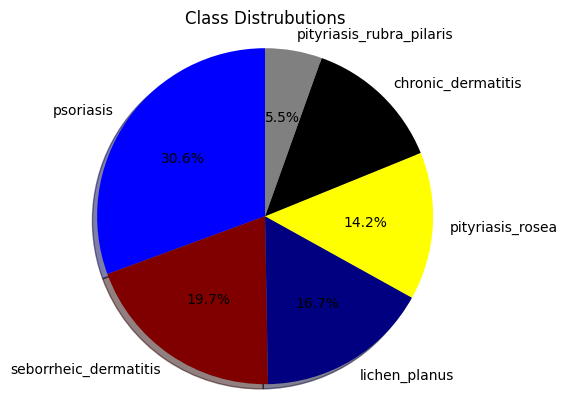

In [123]:
psoriasis, seborrheic_dermatitis,lichen_planus,pityriasis_rosea,chronic_dermatitis, pityriasis_rubra_pilaris= data["class"].value_counts().tolist()
labels = ["psoriasis", "seborrheic_dermatitis", "lichen_planus", "pityriasis_rosea", "chronic_dermatitis", "pityriasis_rubra_pilaris"]
values = [psoriasis, seborrheic_dermatitis,lichen_planus,pityriasis_rosea,chronic_dermatitis, pityriasis_rubra_pilaris]
colors=['blue','maroon','navy','yellow','black','gray']
fig1, ax1 = plt.subplots()
ax1.pie(values,  labels=labels, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Class Distrubutions")
plt.show()

In [136]:
psoriasis, seborrheic_dermatitis,lichen_planus,pityriasis_rosea,chronic_dermatitis, pityriasis_rubra_pilaris=data["class"].value_counts().tolist()
labels = ["psoriasis", "seborrheic_dermatitis", "lichen_planus", "pityriasis_rosea", "chronic_dermatitis", "pityriasis_rubra_pilaris"]
class_distrubution = {}
class_distrubution["proriasis"] = psoriasis
class_distrubution["seborrheic_dermatitis"] = seborrheic_dermatitis
class_distrubution["lichen_planus"] = lichen_planus
class_distrubution["pityriasis_rosea"] = pityriasis_rosea
class_distrubution["chronic_dermatitis"] = chronic_dermatitis
class_distrubution["pityriasis_rubra_pilaris"] = pityriasis_rubra_pilaris



In [143]:
df_class_distrubution = pd.DataFrame.from_dict(class_distrubution, orient='index', columns= ["values"])
df_class_distrubution

,values
proriasis,112
seborrheic_dermatitis,72
lichen_planus,61
pityriasis_rosea,52
chronic_dermatitis,49
pityriasis_rubra_pilaris,20


In [109]:
data.shape

(366, 35)

In [4]:
data['age'].replace("?", np.nan, inplace=True)
si = SimpleImputer(missing_values=np.nan,strategy='mean')
si.fit(np.asarray(data['age'].astype(float)).reshape(-1, 1))
data['age'] = si.transform(np.asarray(data['age'].astype(float)).reshape(-1, 1))

In [5]:
def plots(df, x):
    f,ax=plt.subplots(1,2,figsize=(25,10))
    Group_data = data.groupby(x)
    sns.barplot(x = Group_data['age'].mean().index, y = Group_data['age'].mean().values,ax= ax[0],  palette = 'mako')
    for container in ax[0].containers:
        ax[0].bar_label(container,color='black',size=20)

    palette_color = sns.color_palette('summer')
    plt.pie(x = df[x].value_counts(),
            labels=df[x].value_counts().index,
            autopct='%.0f%%',
            shadow=True,
            colors= palette_color)
    plt.suptitle("Bar plots and pie charts for {}".format(x))
    plt.show()

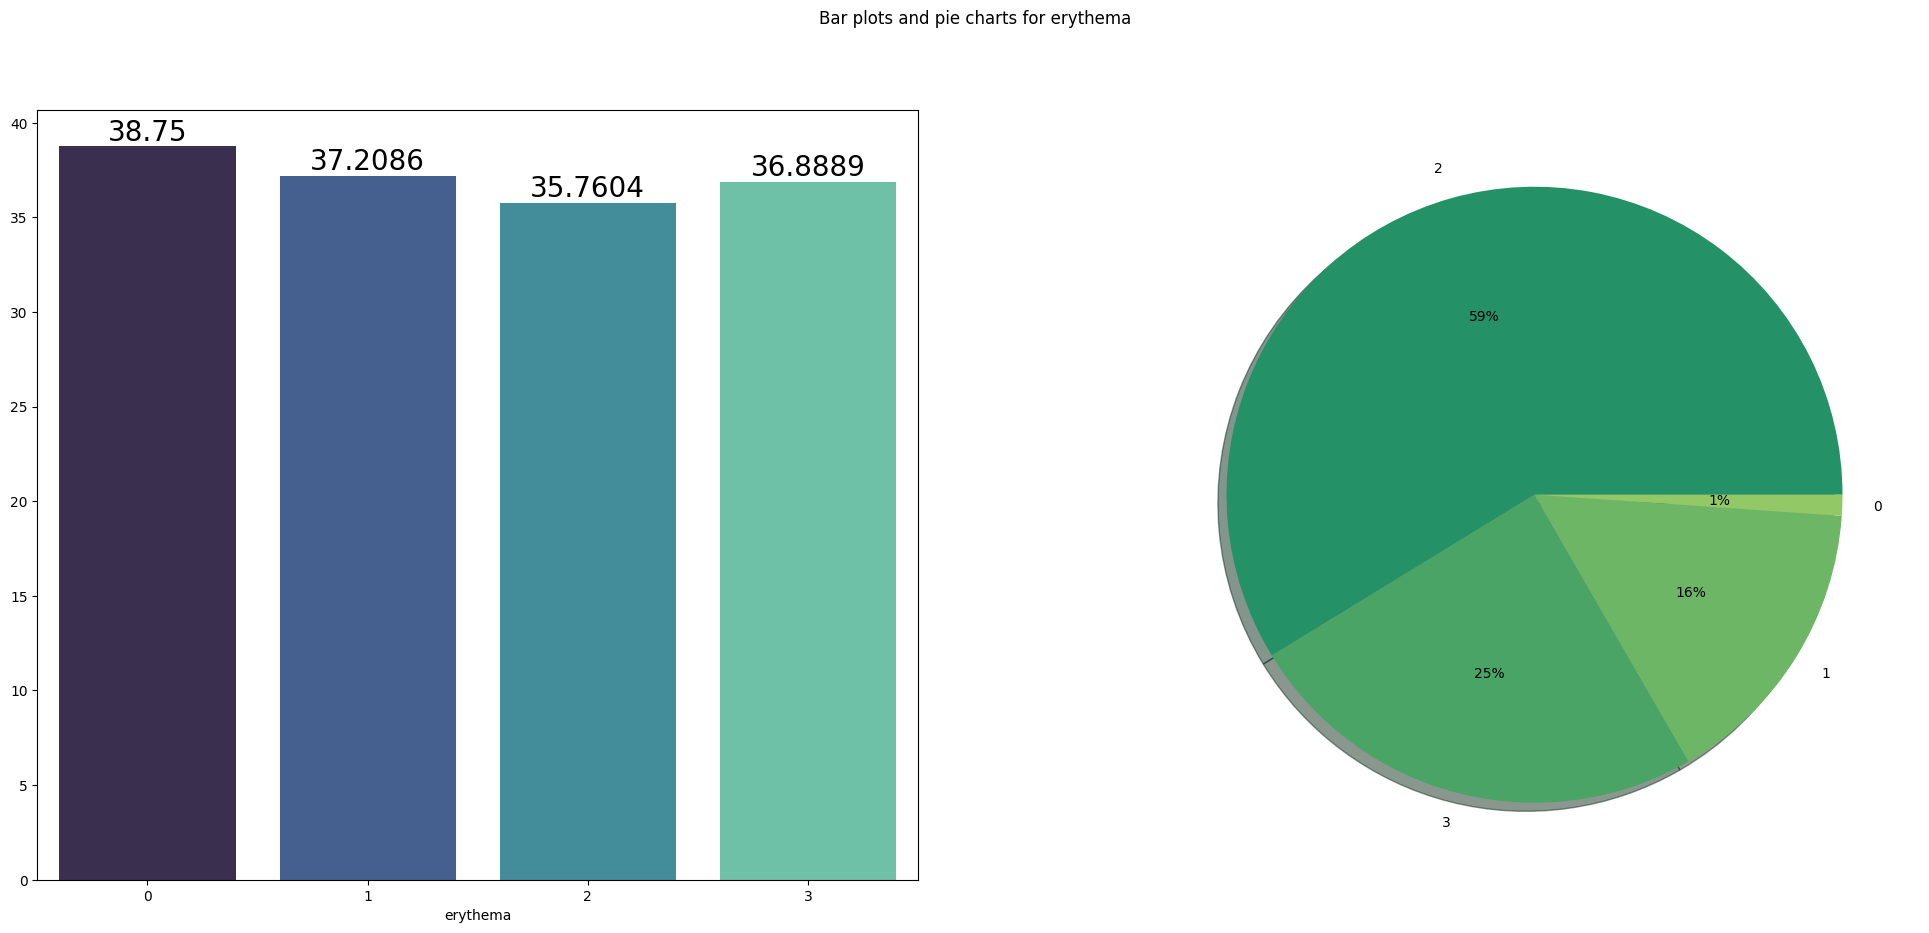

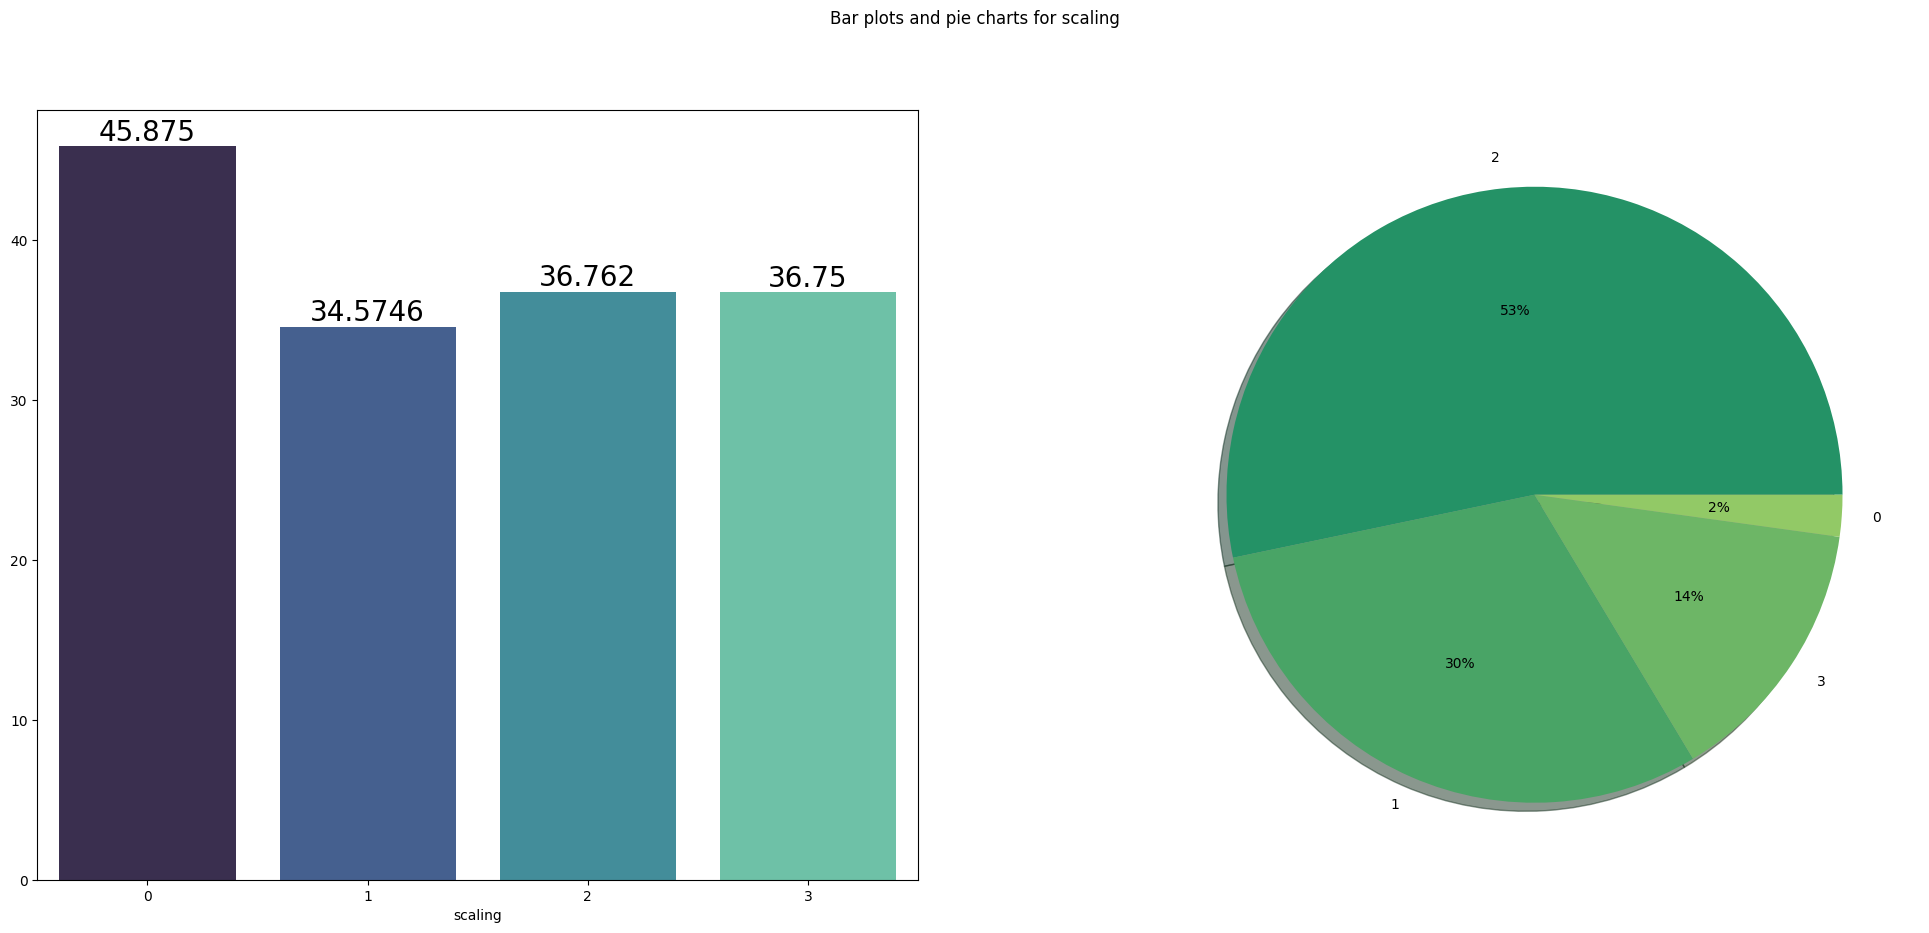

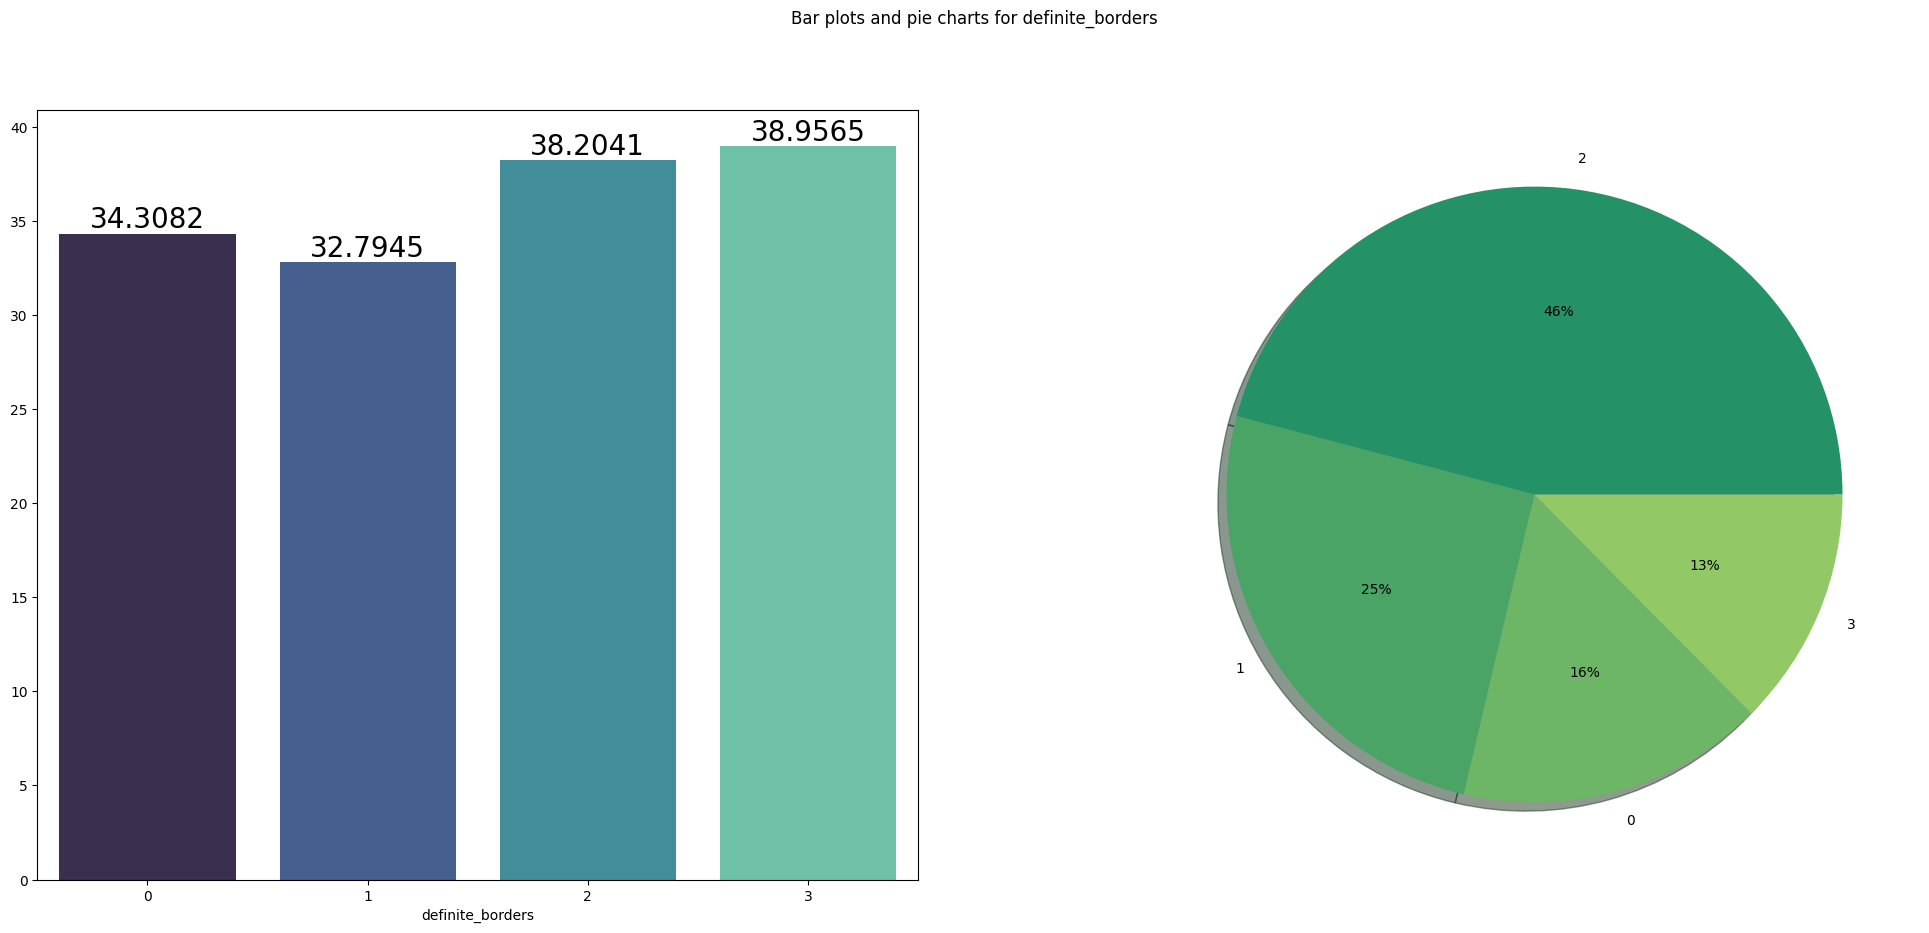

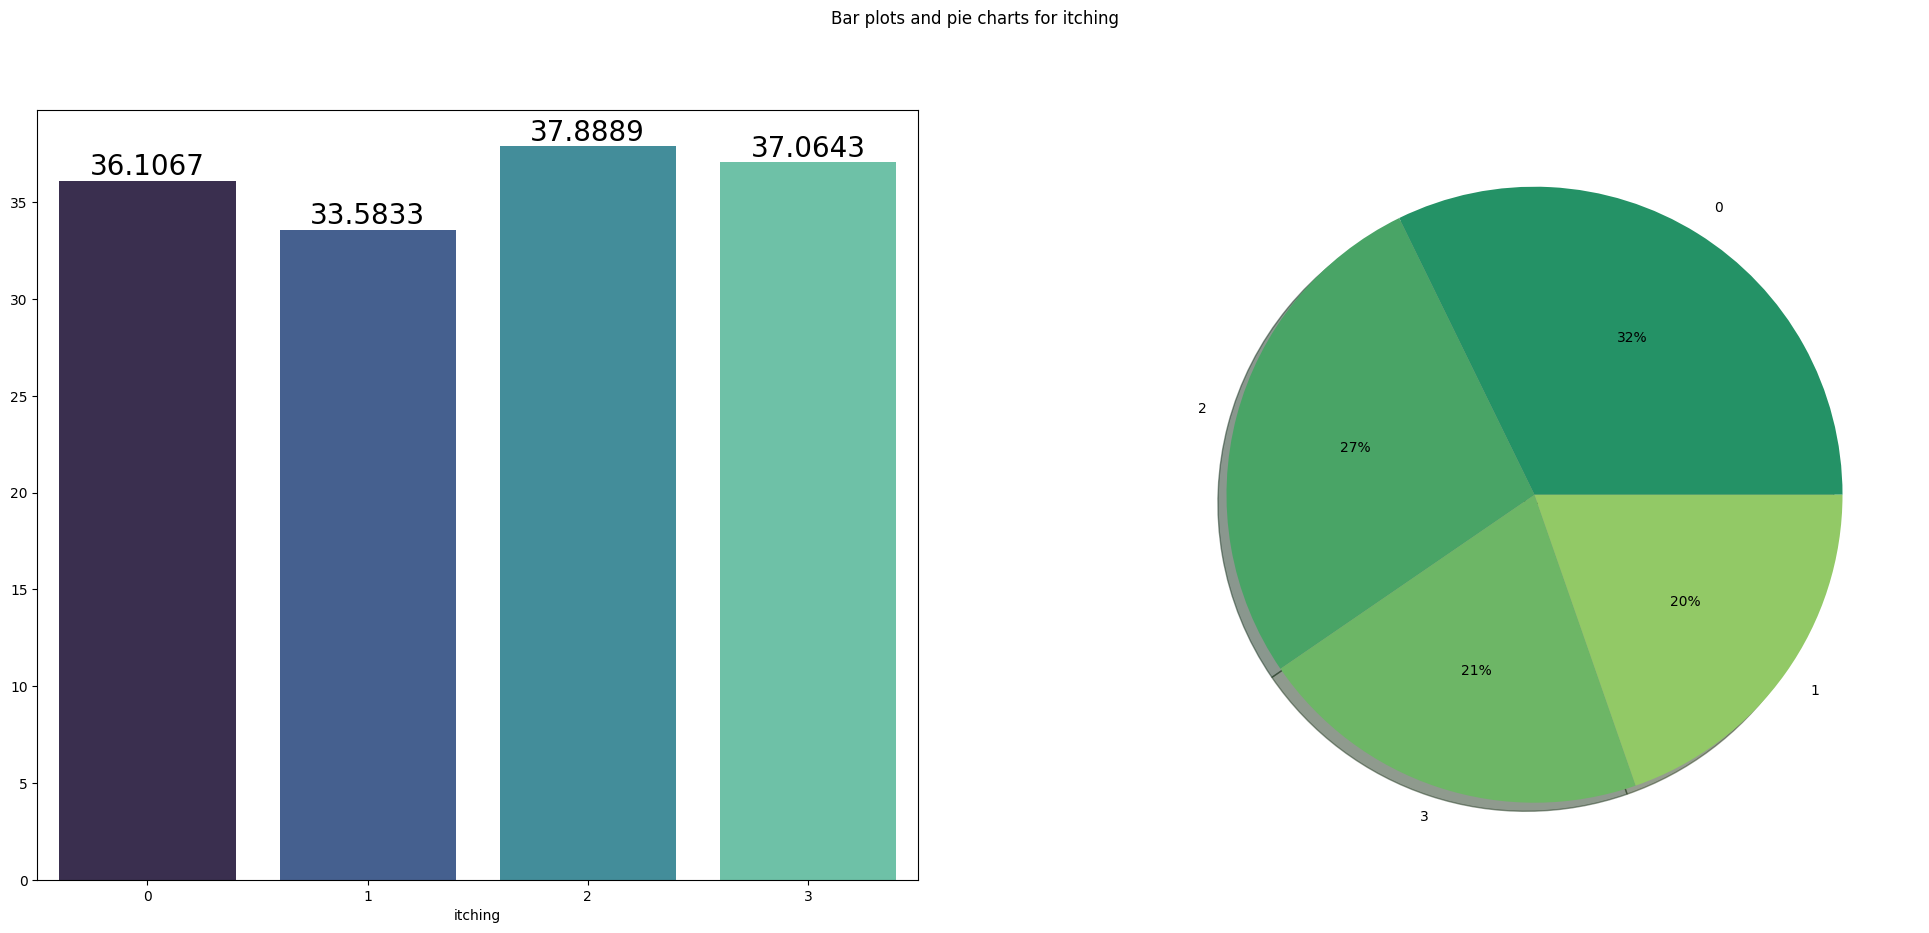

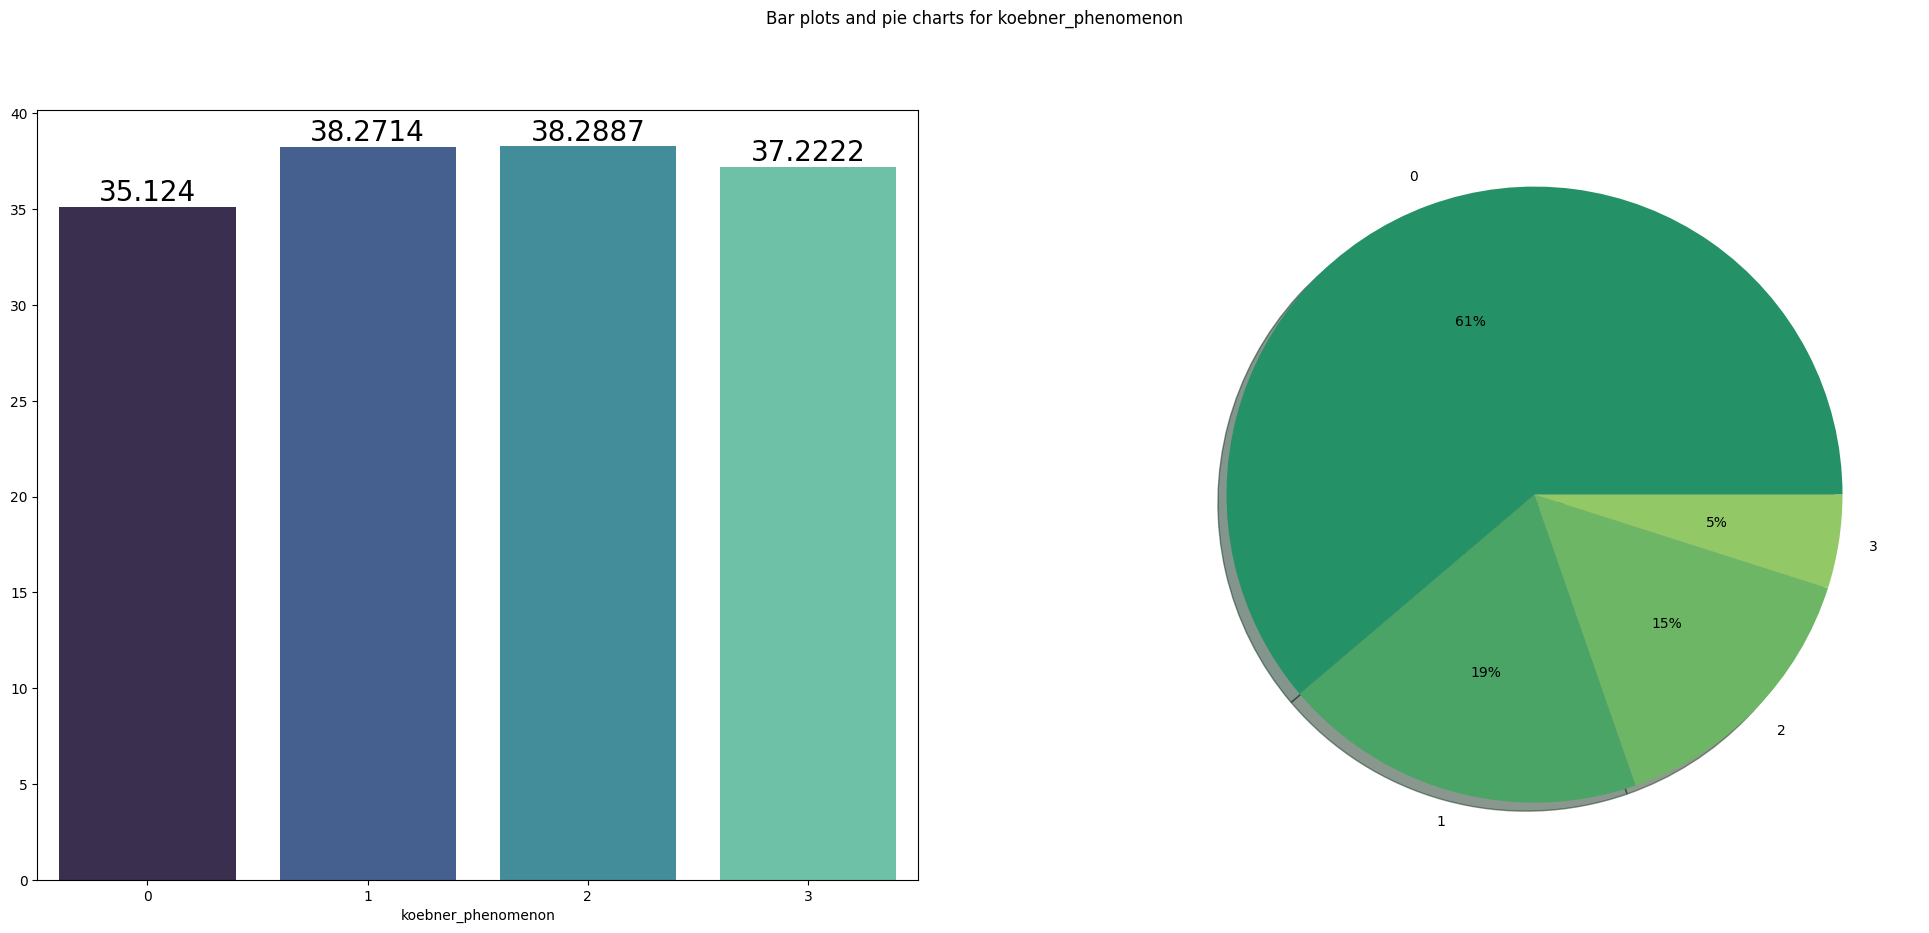

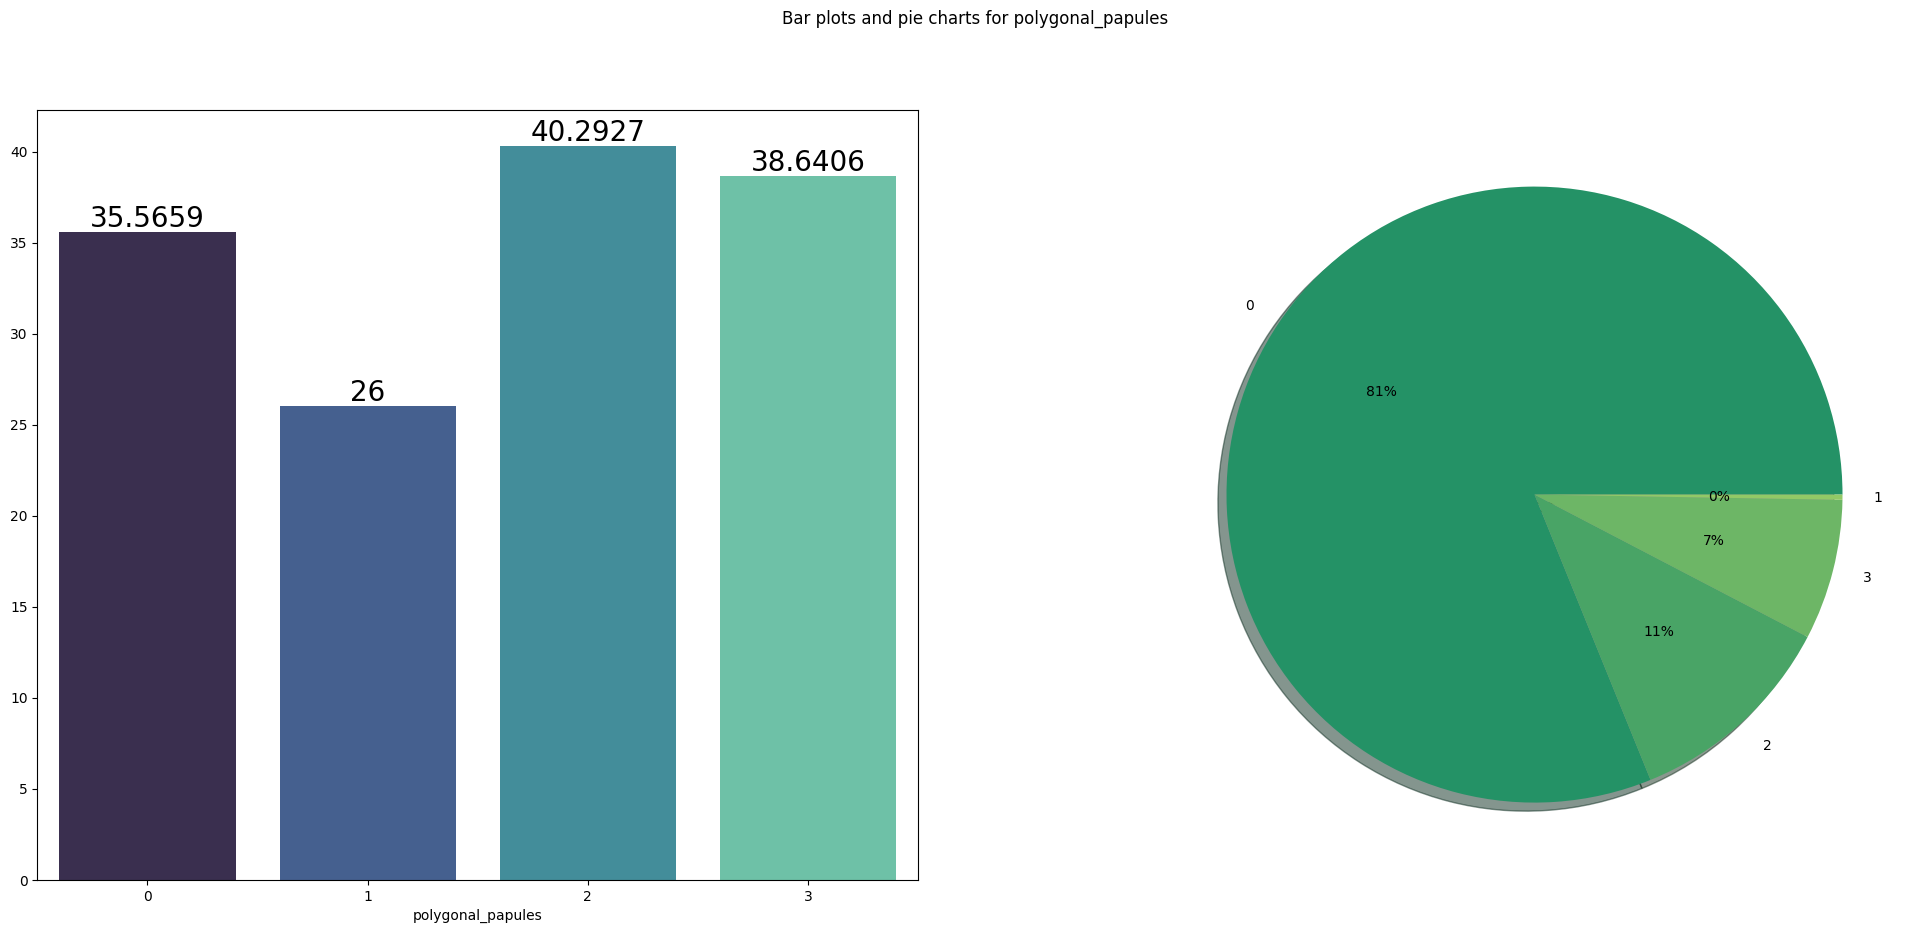

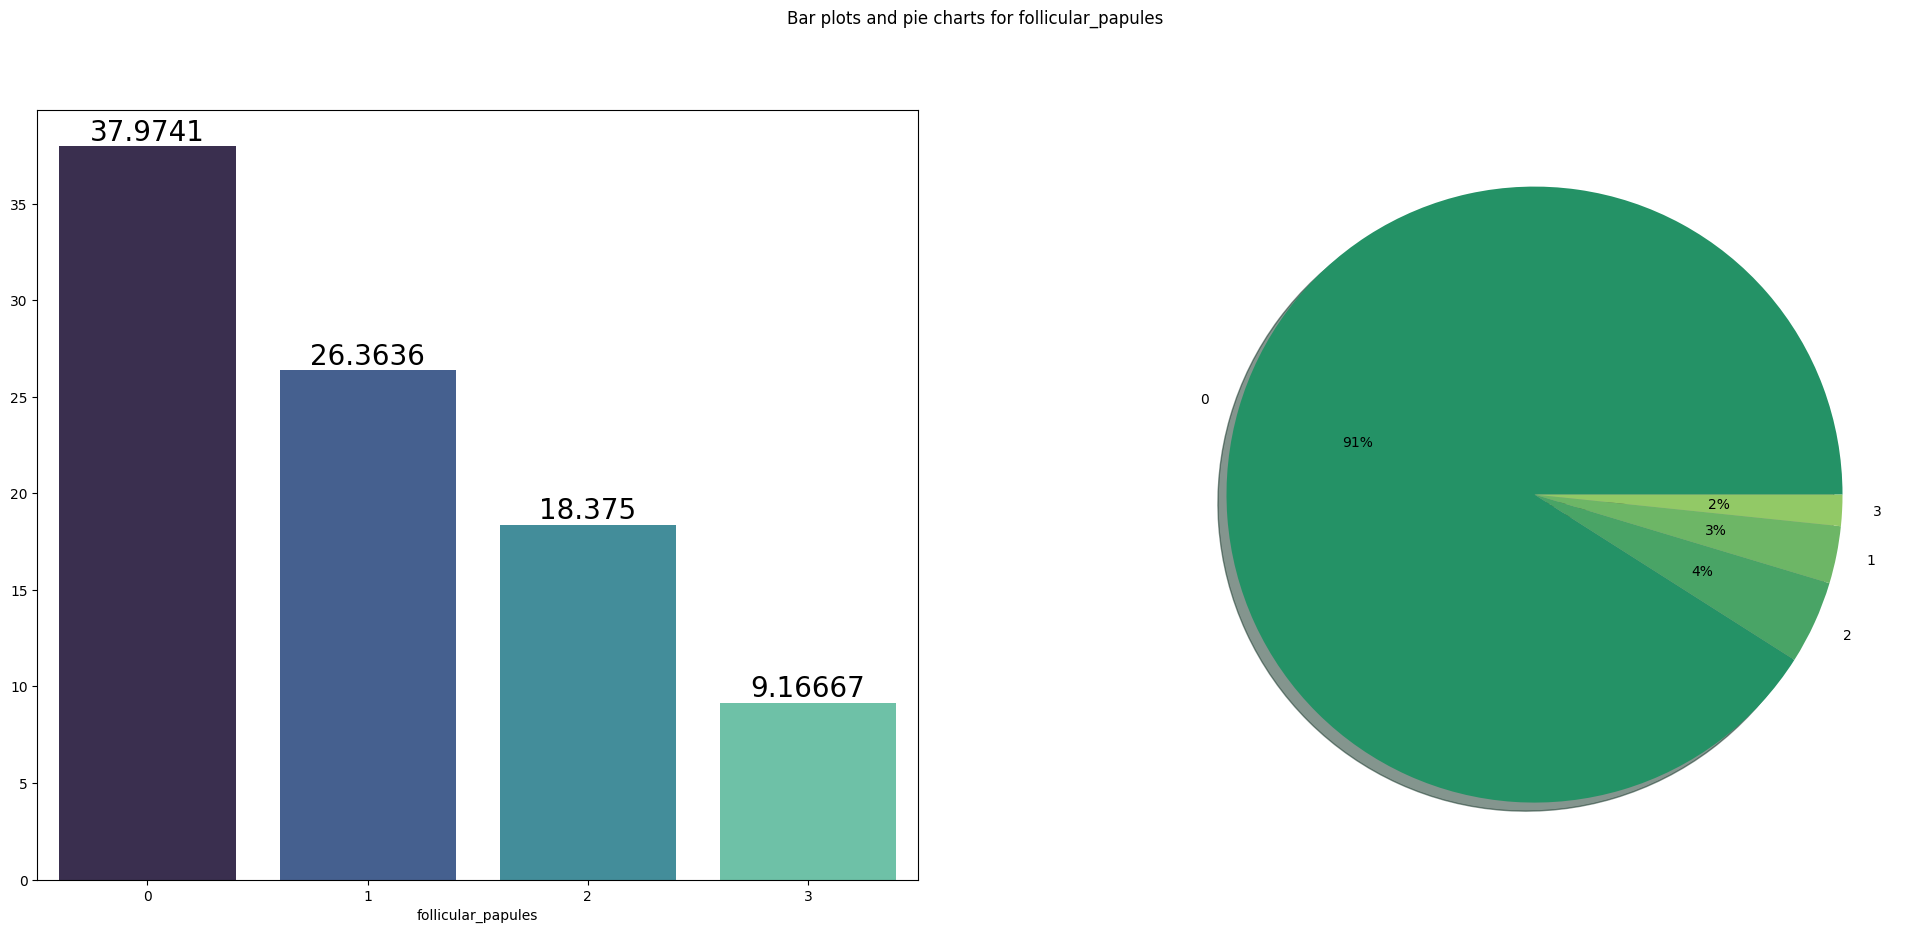

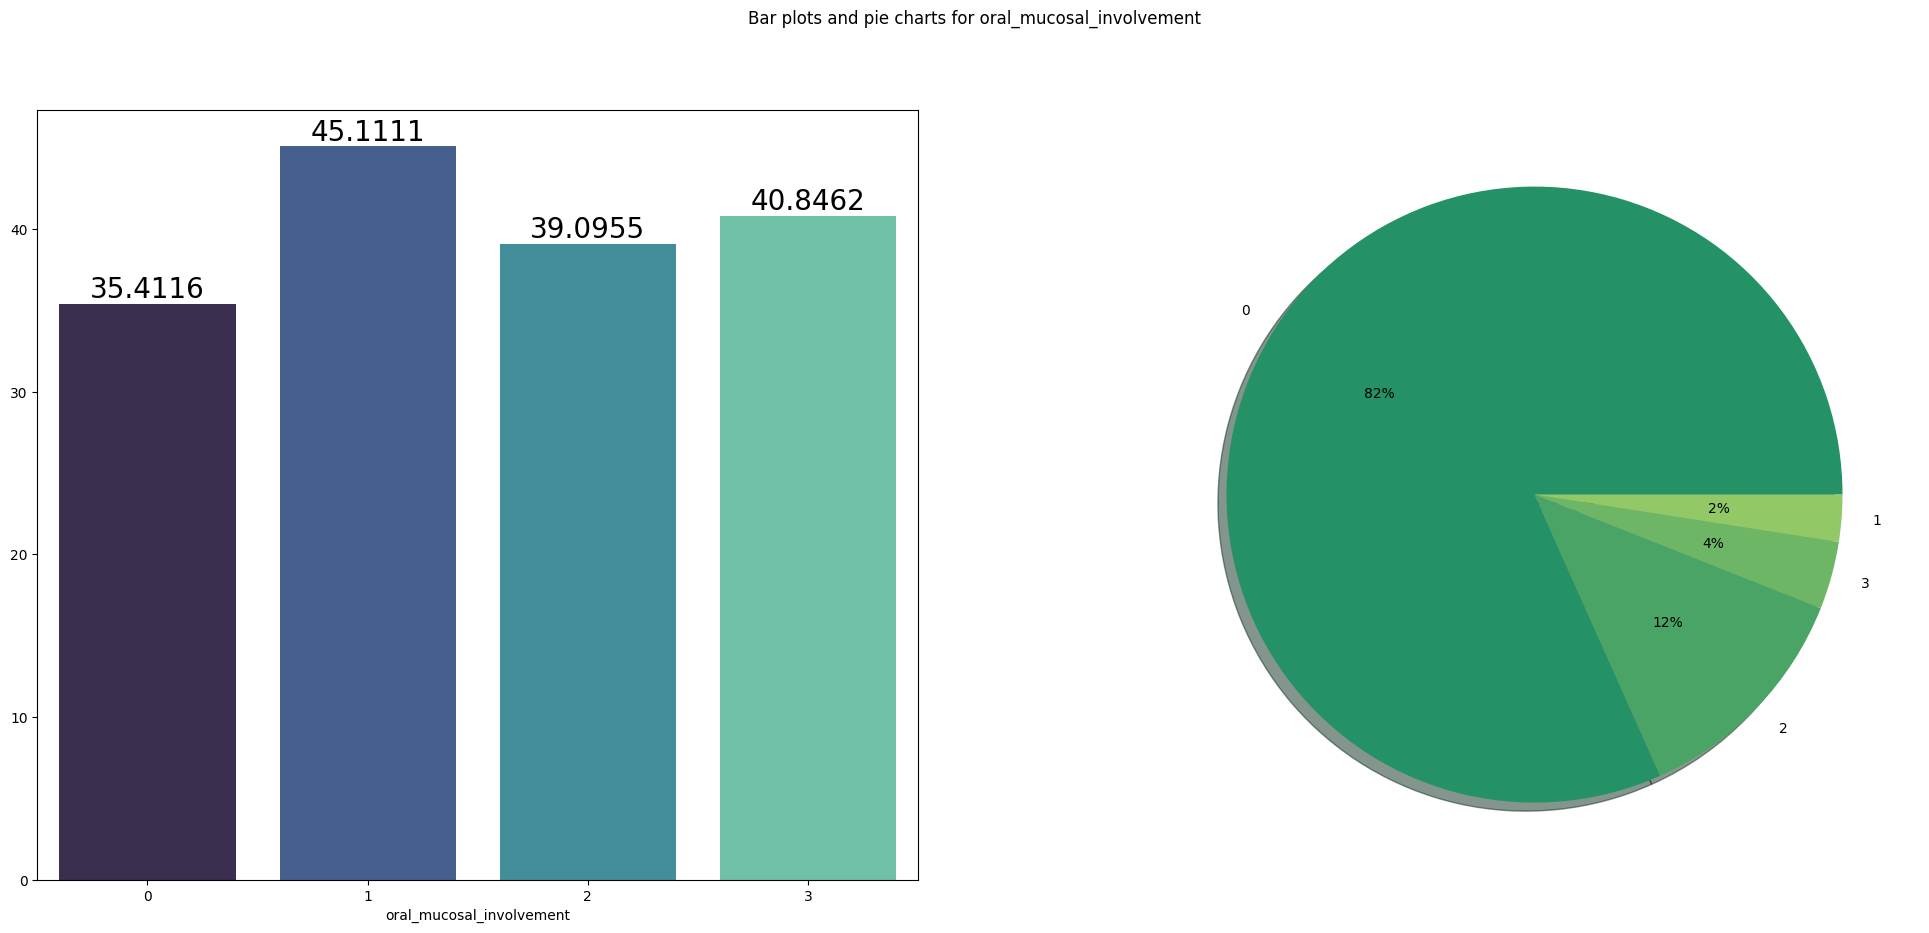

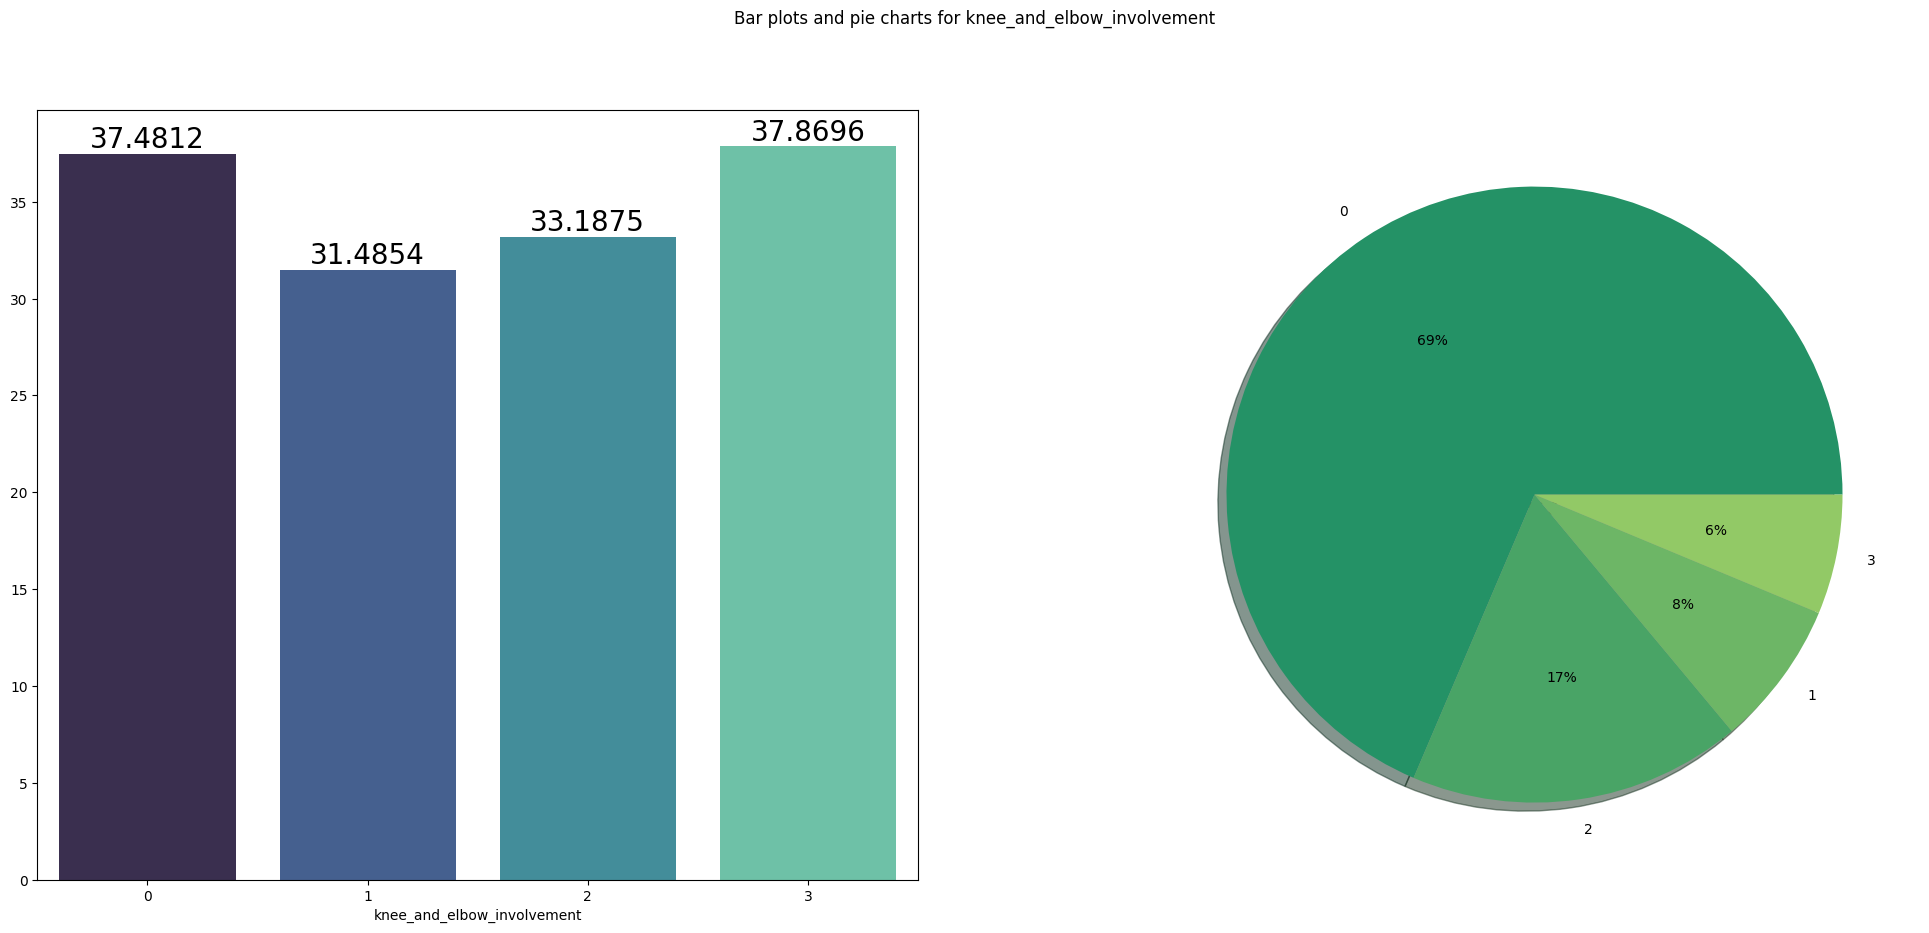

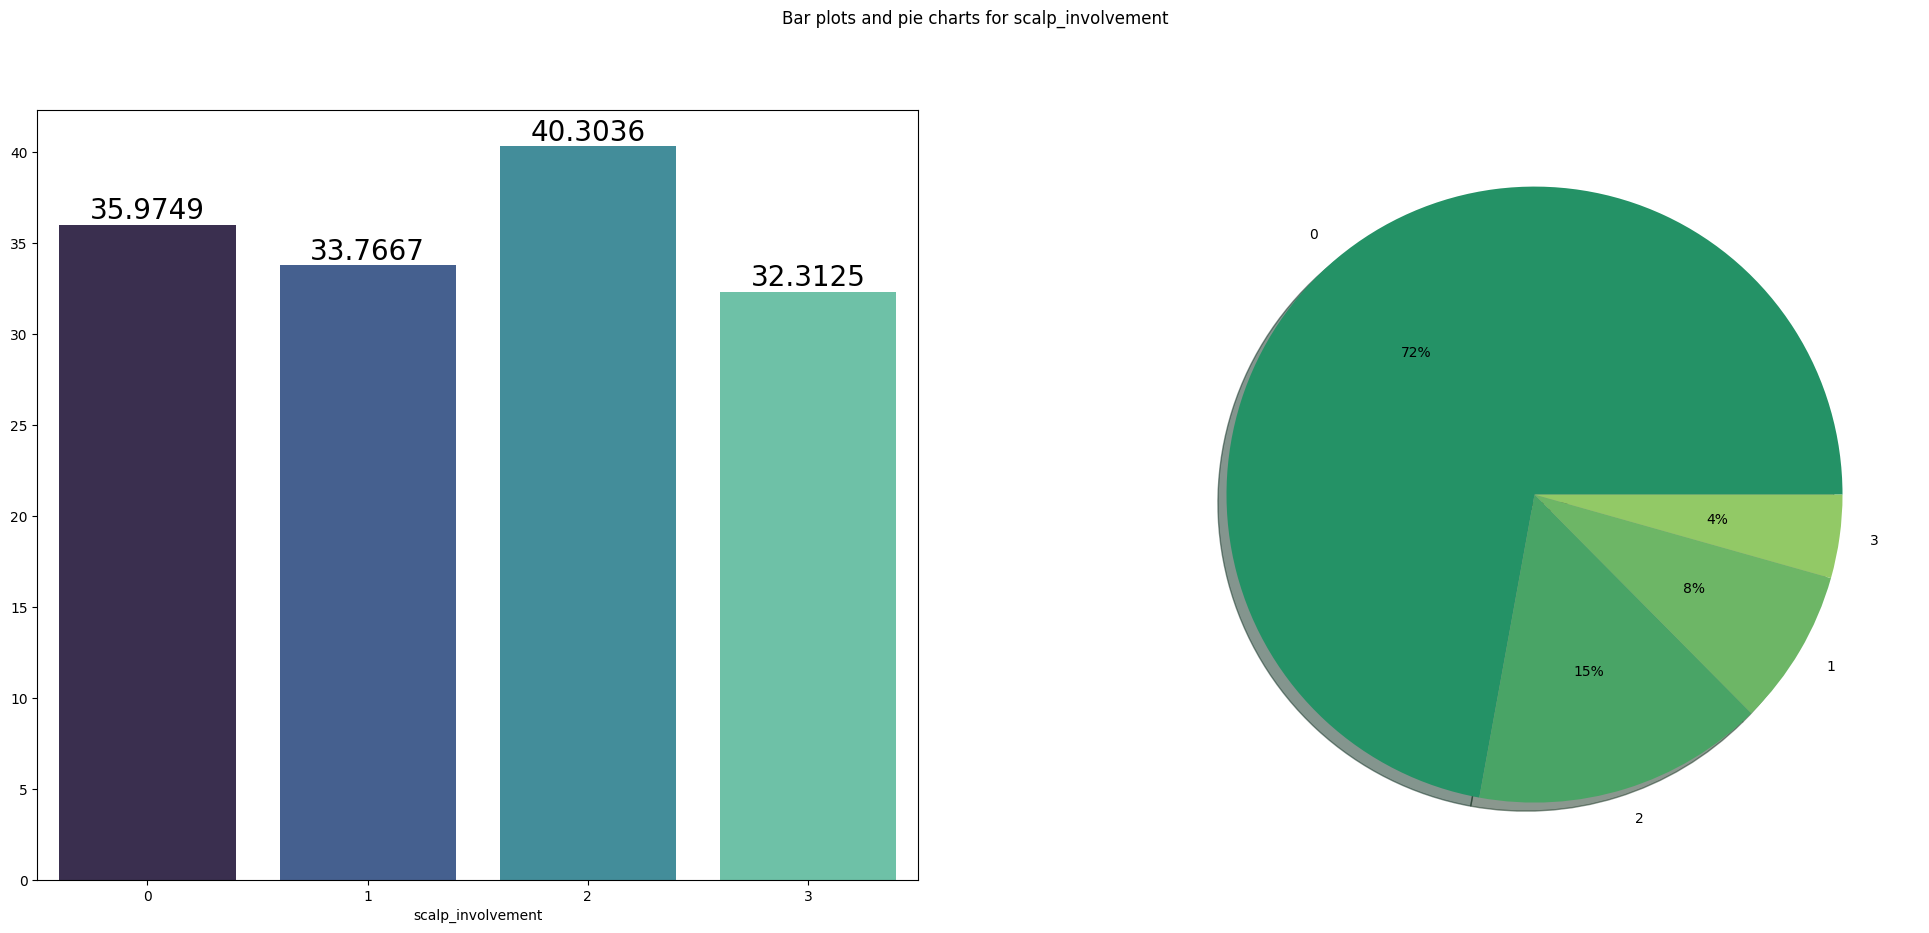

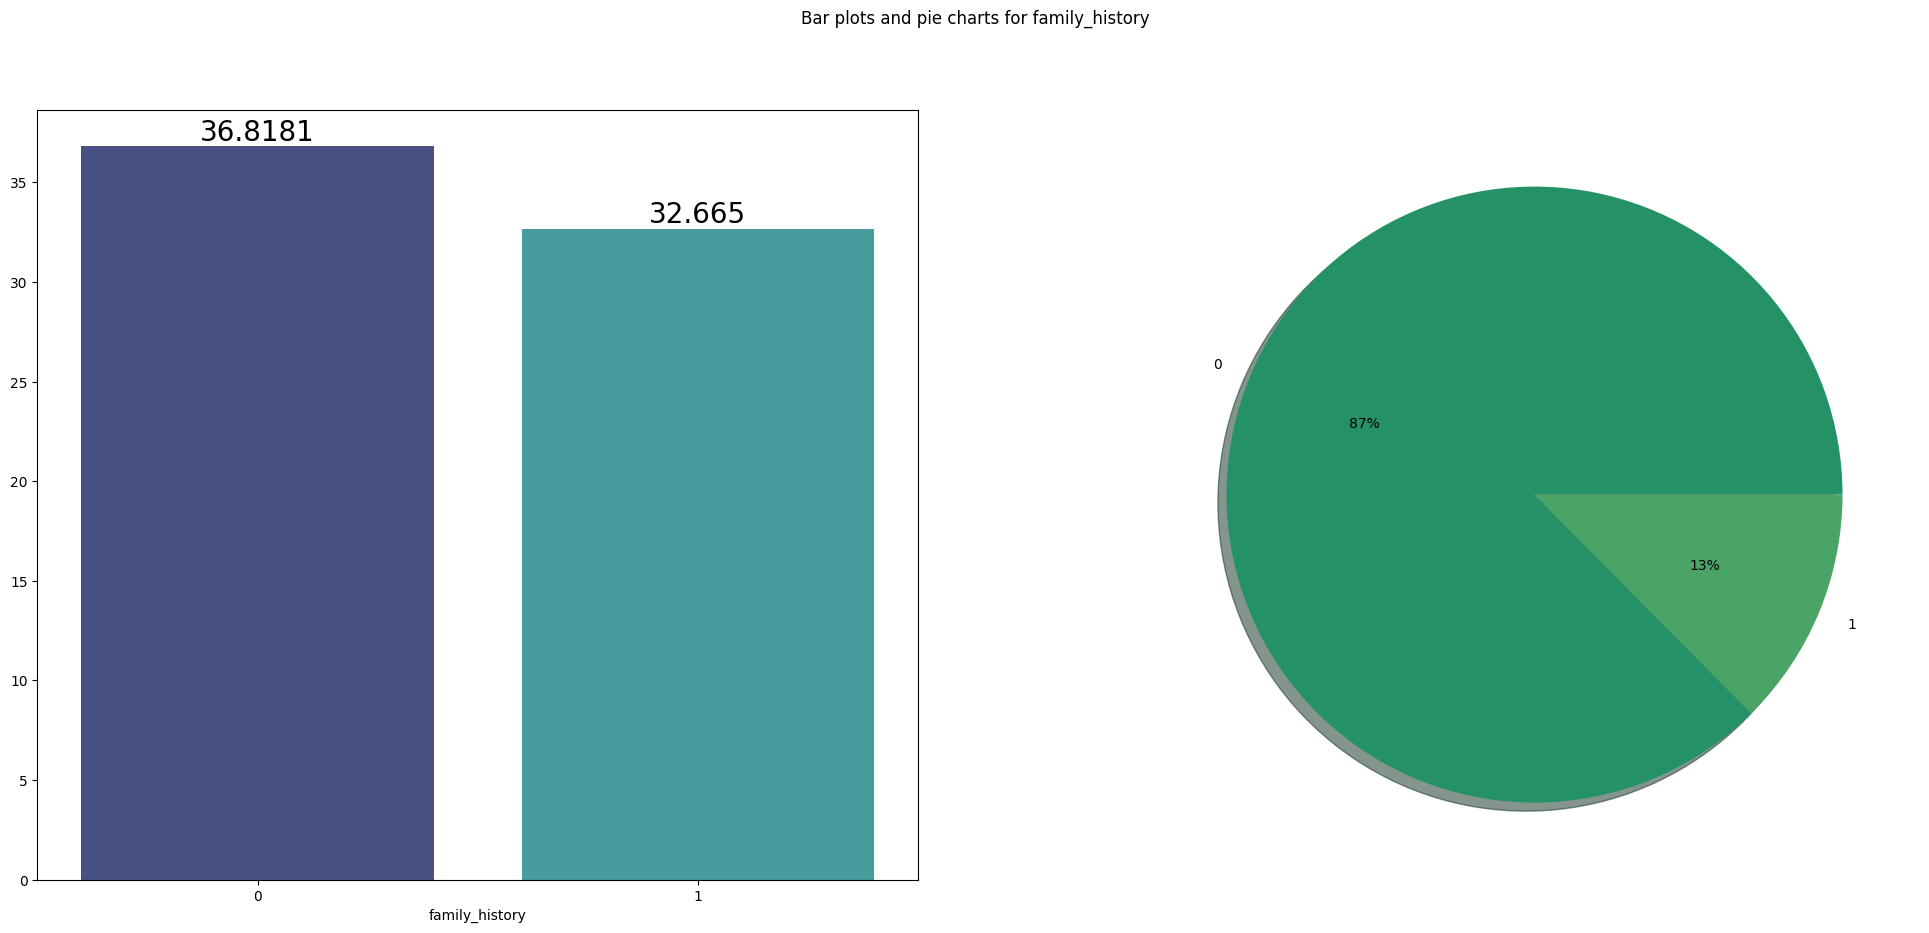

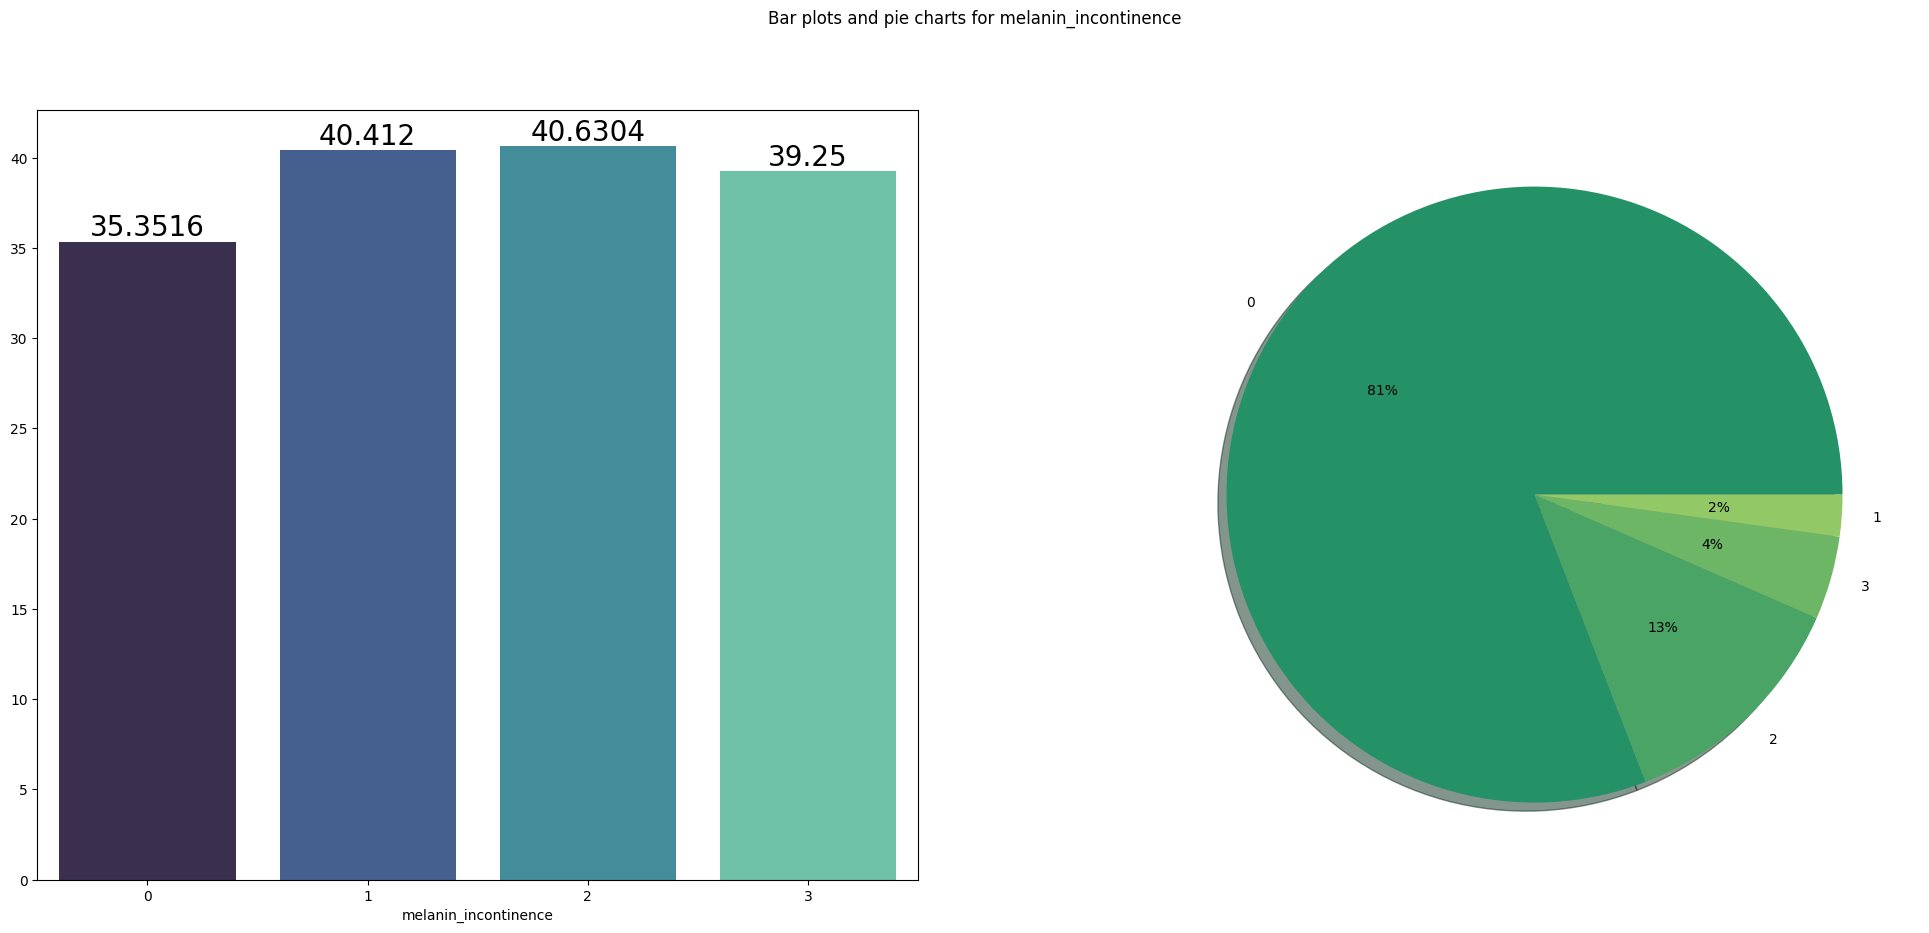

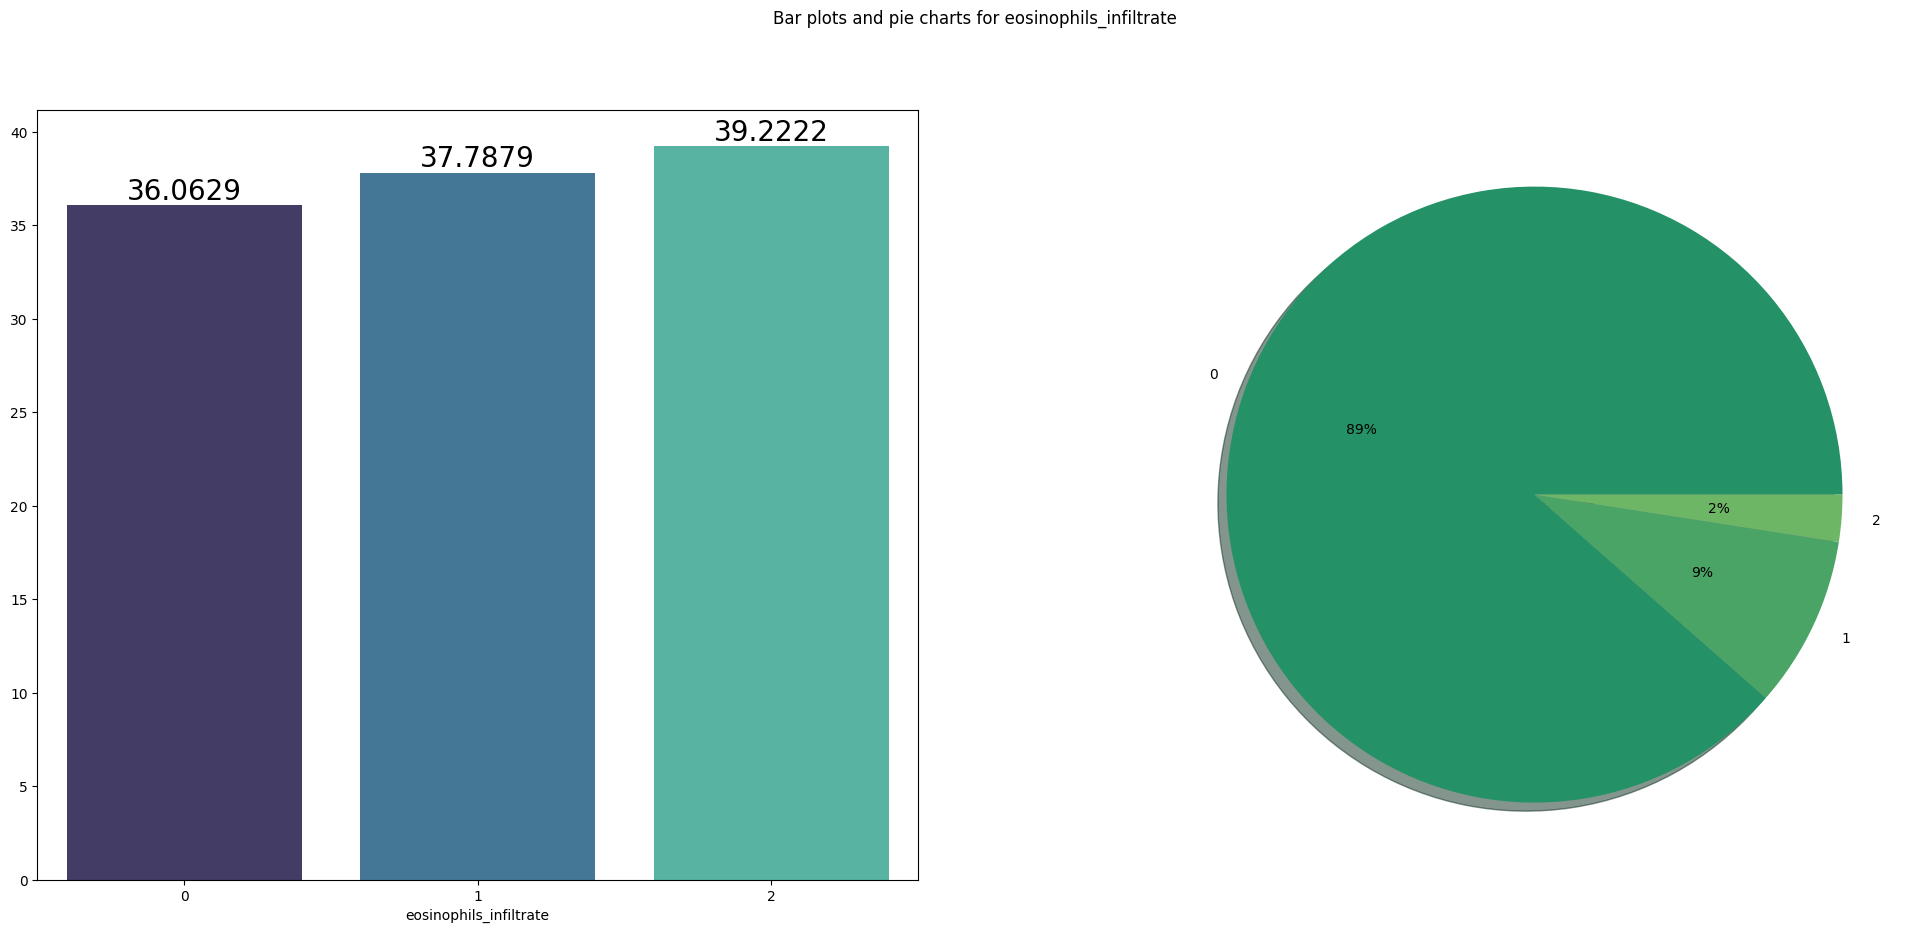

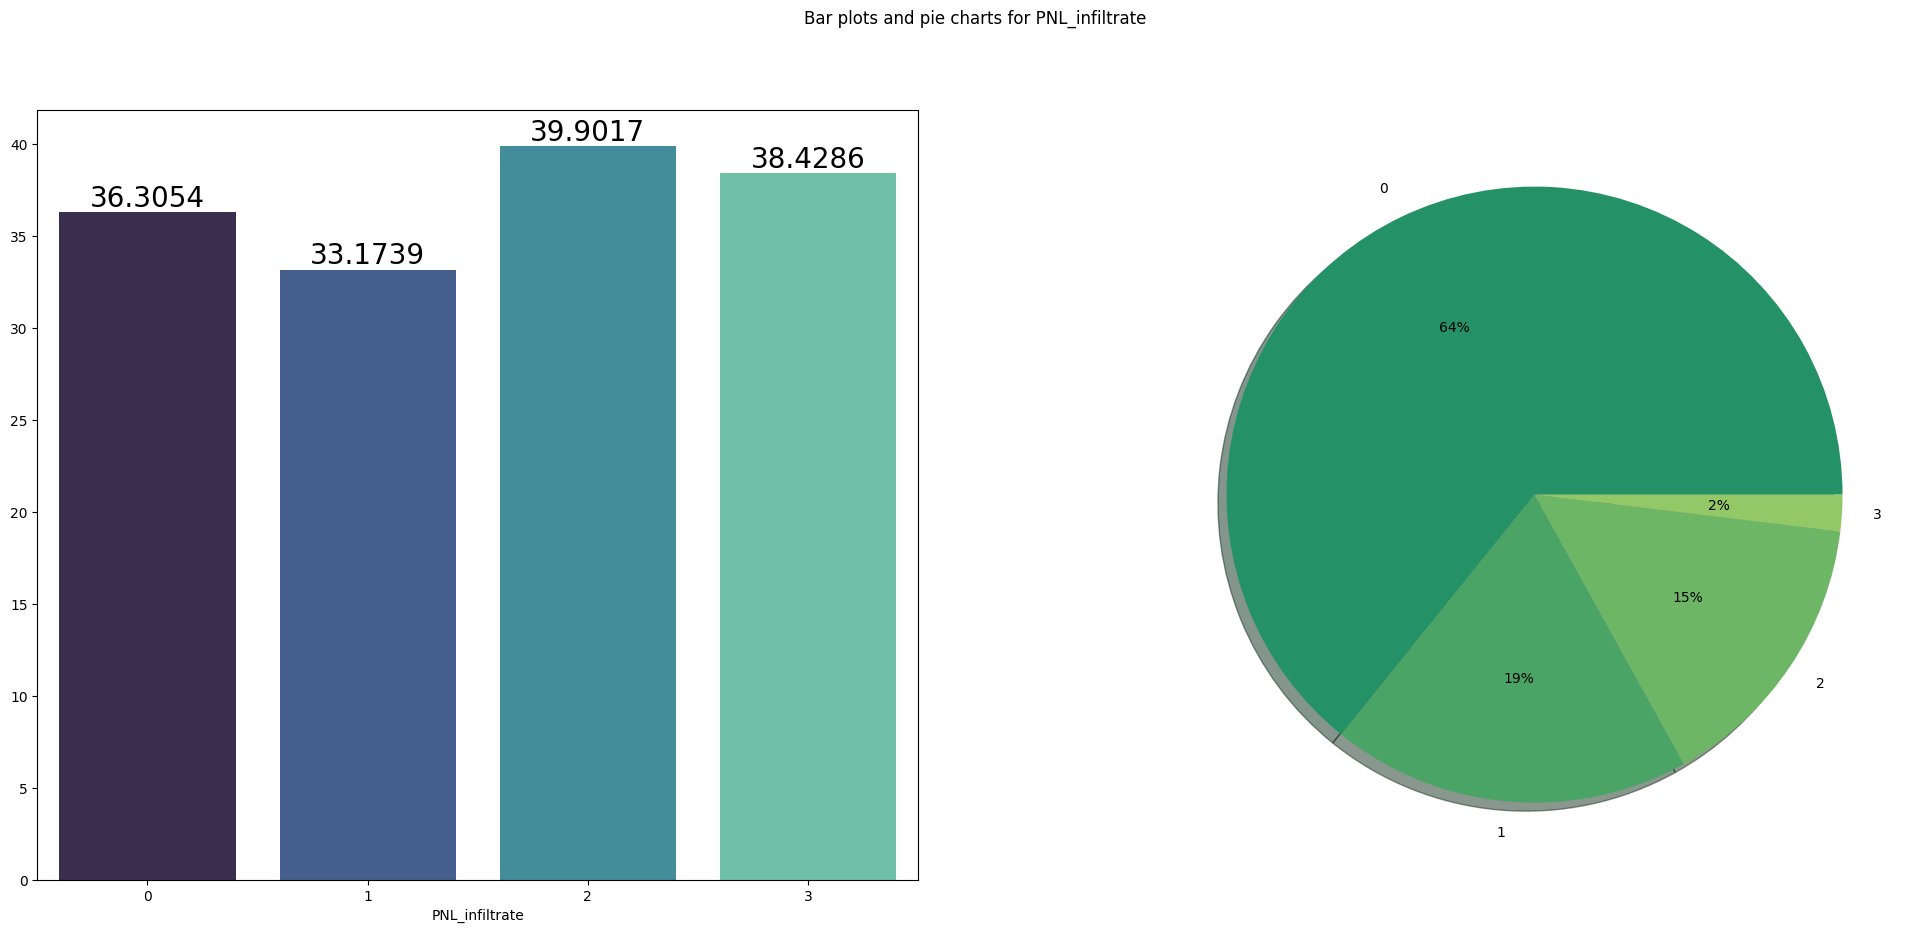

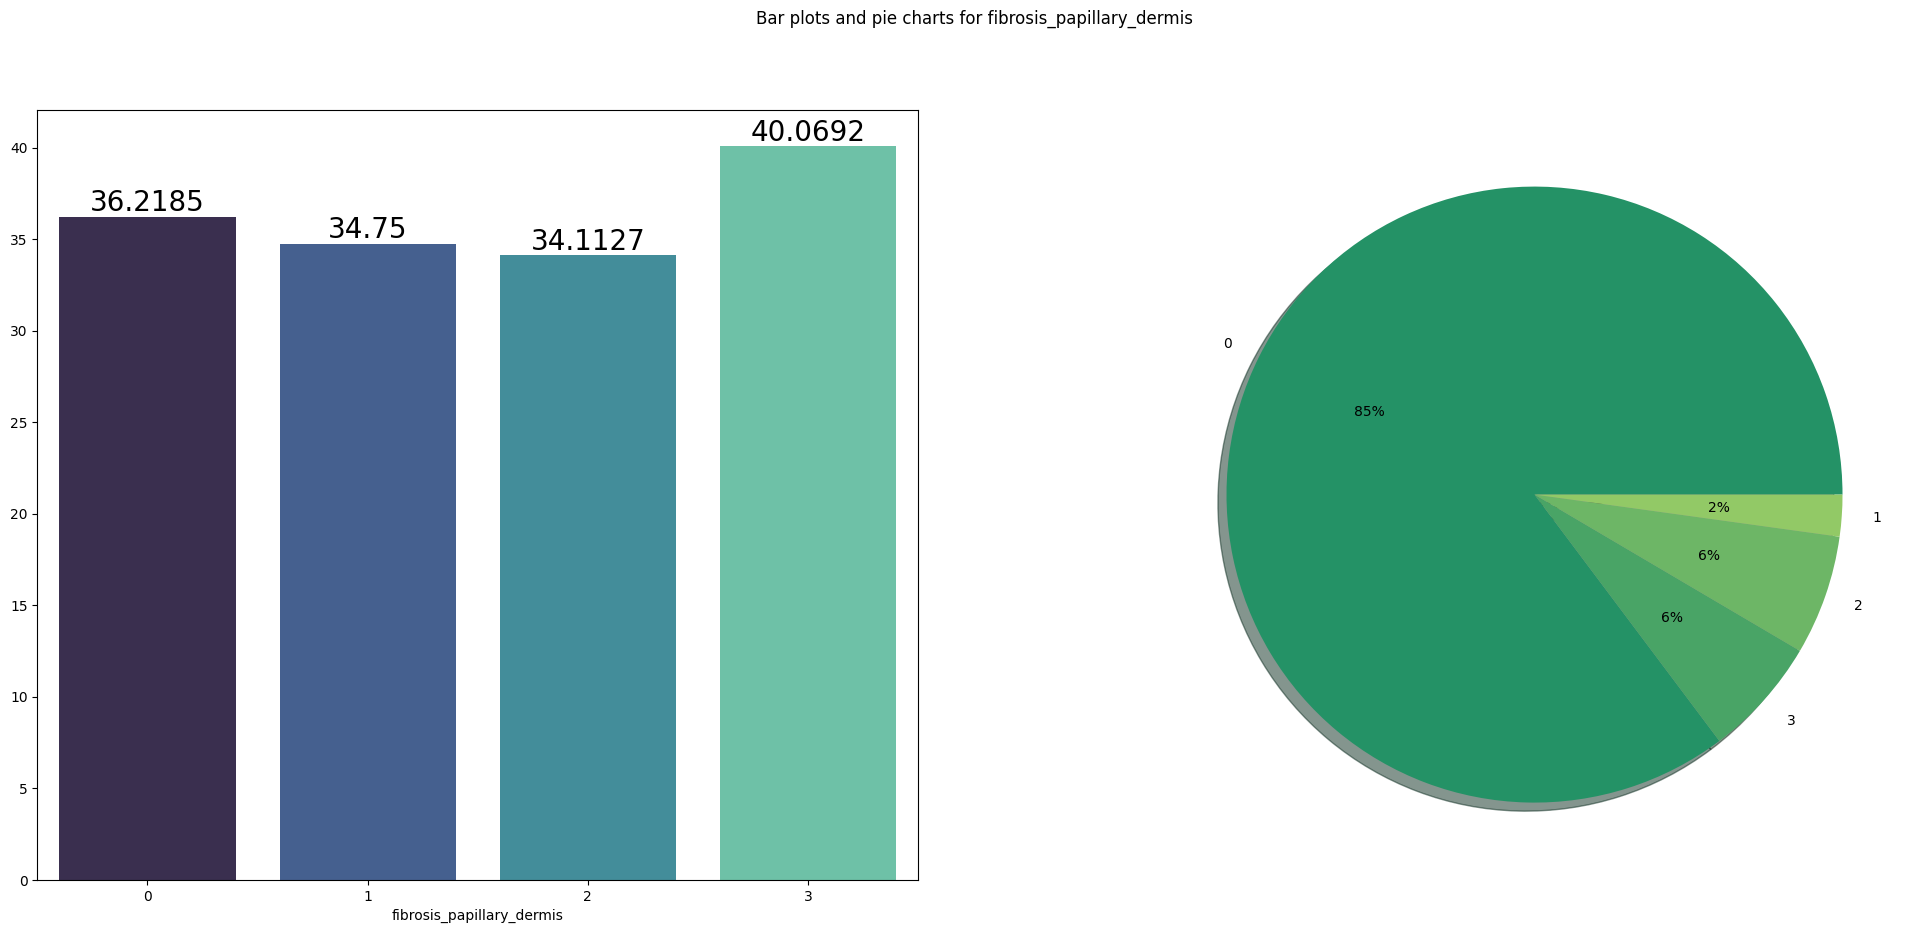

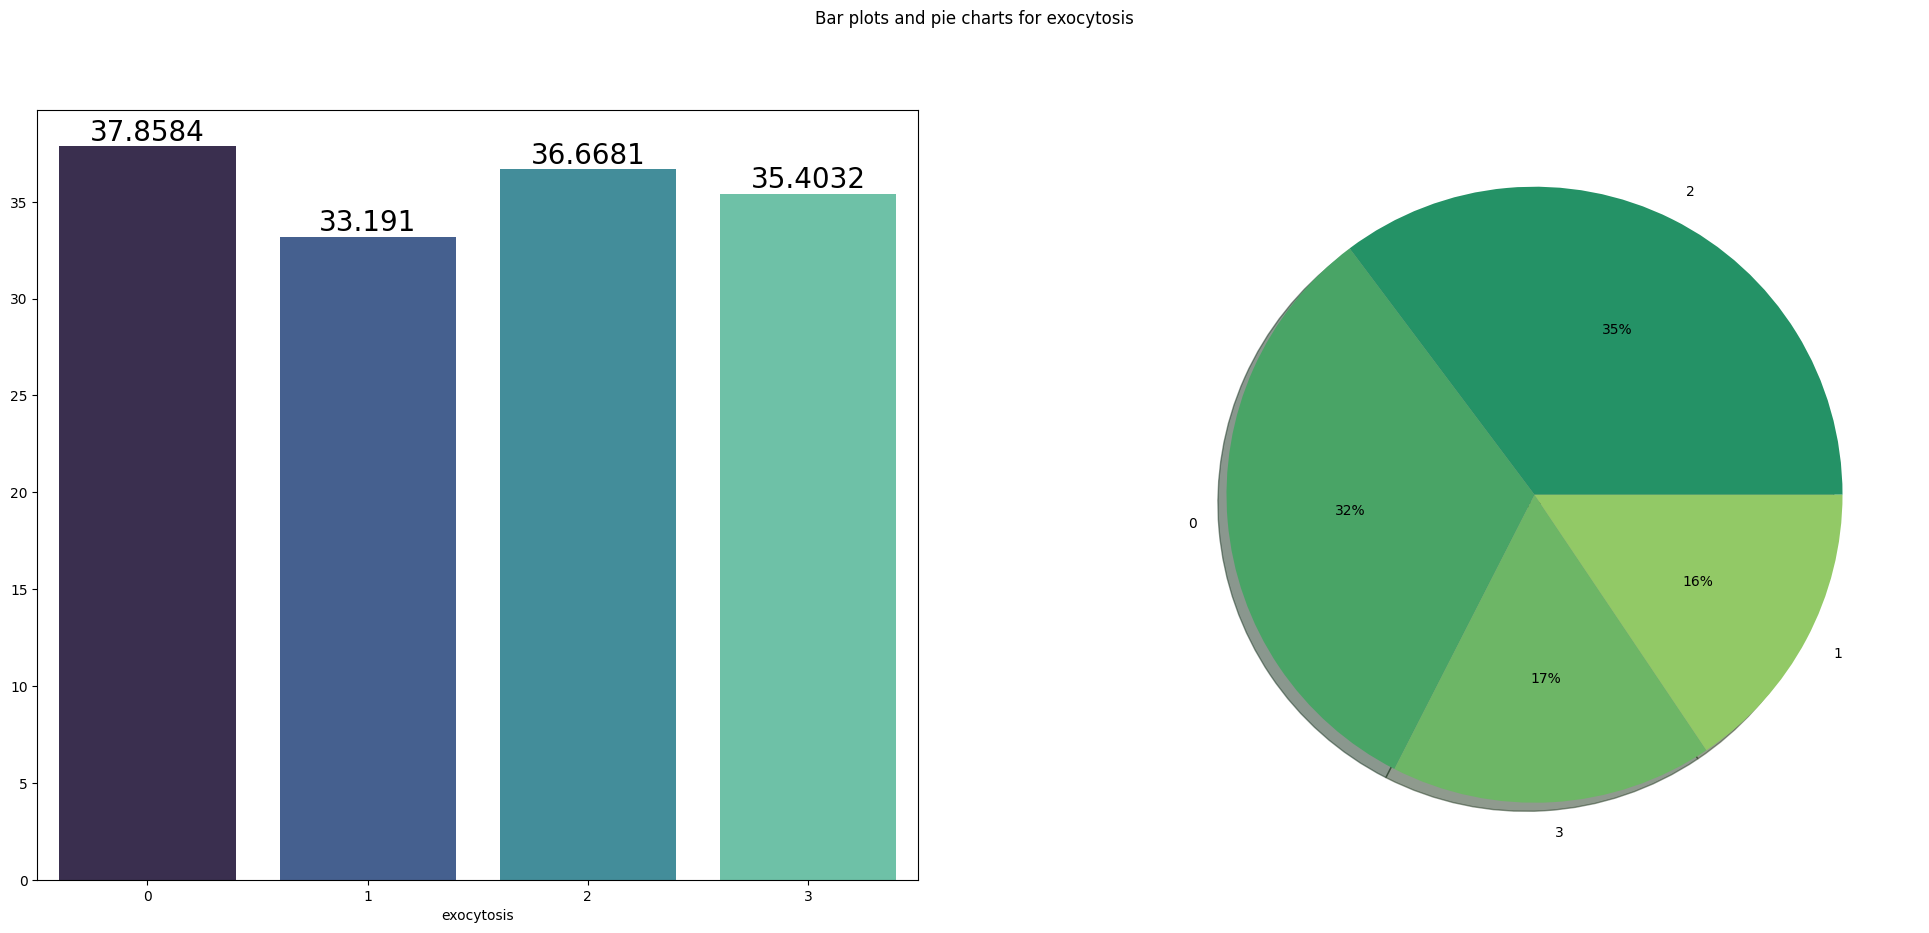

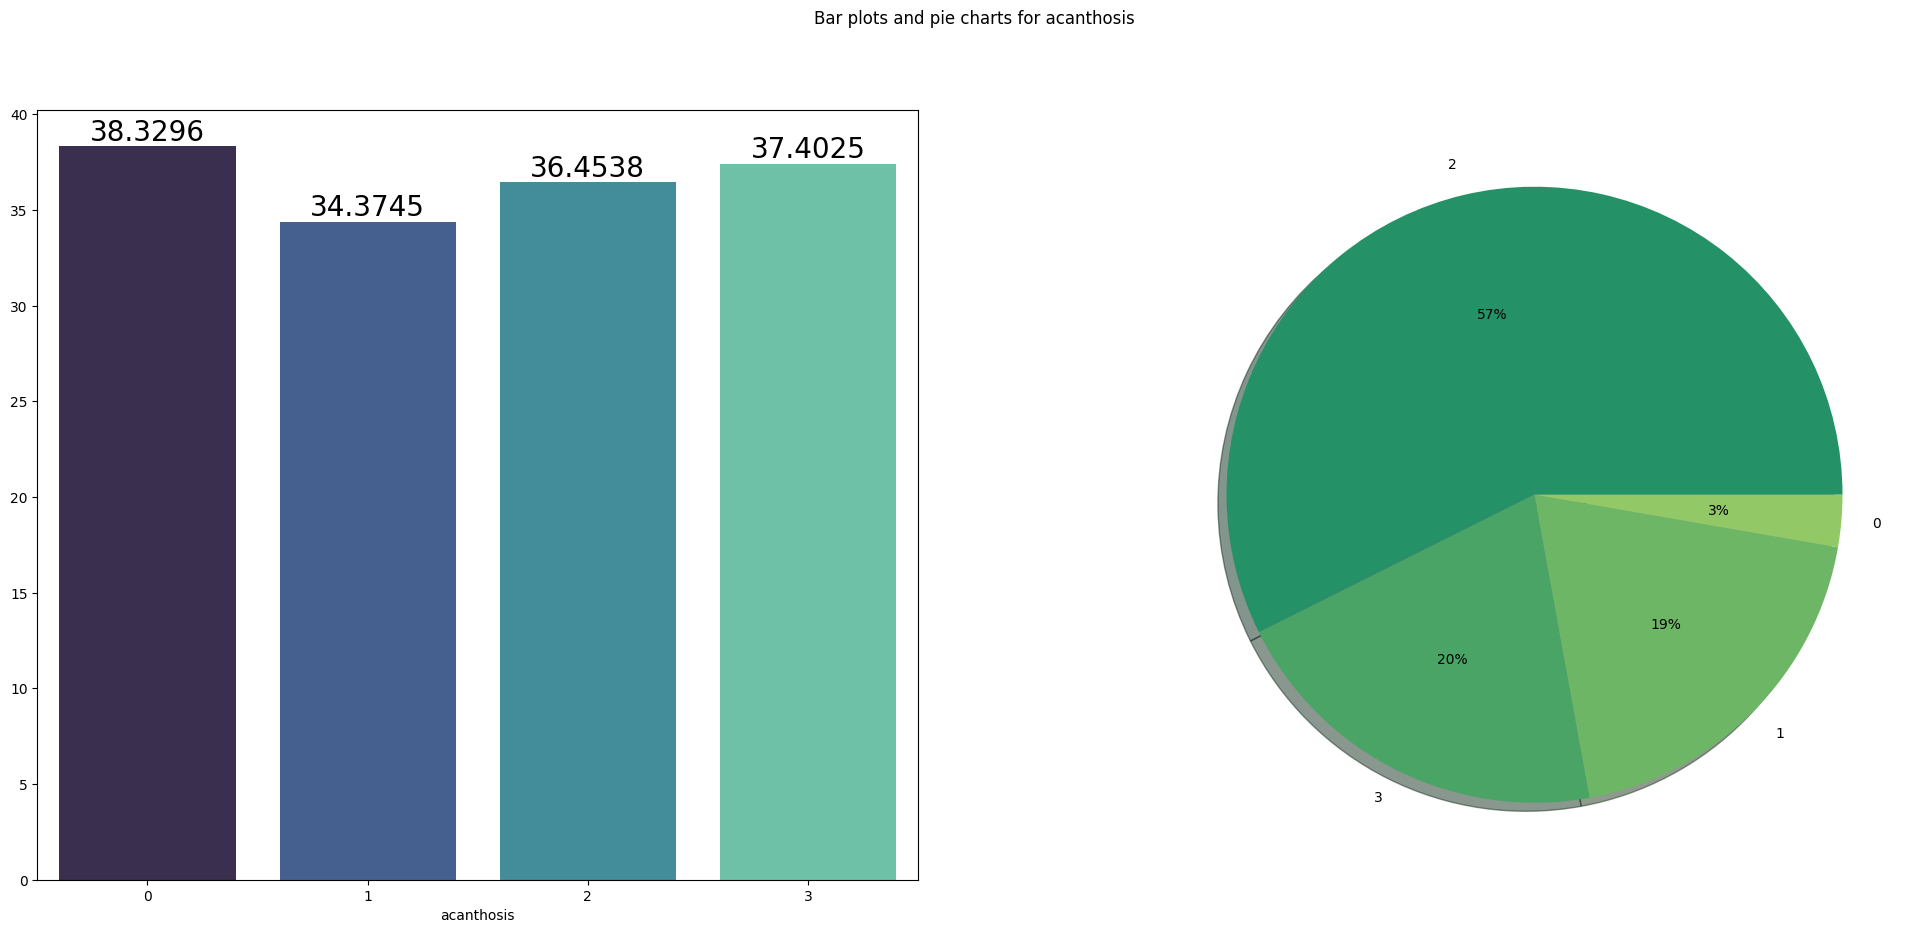

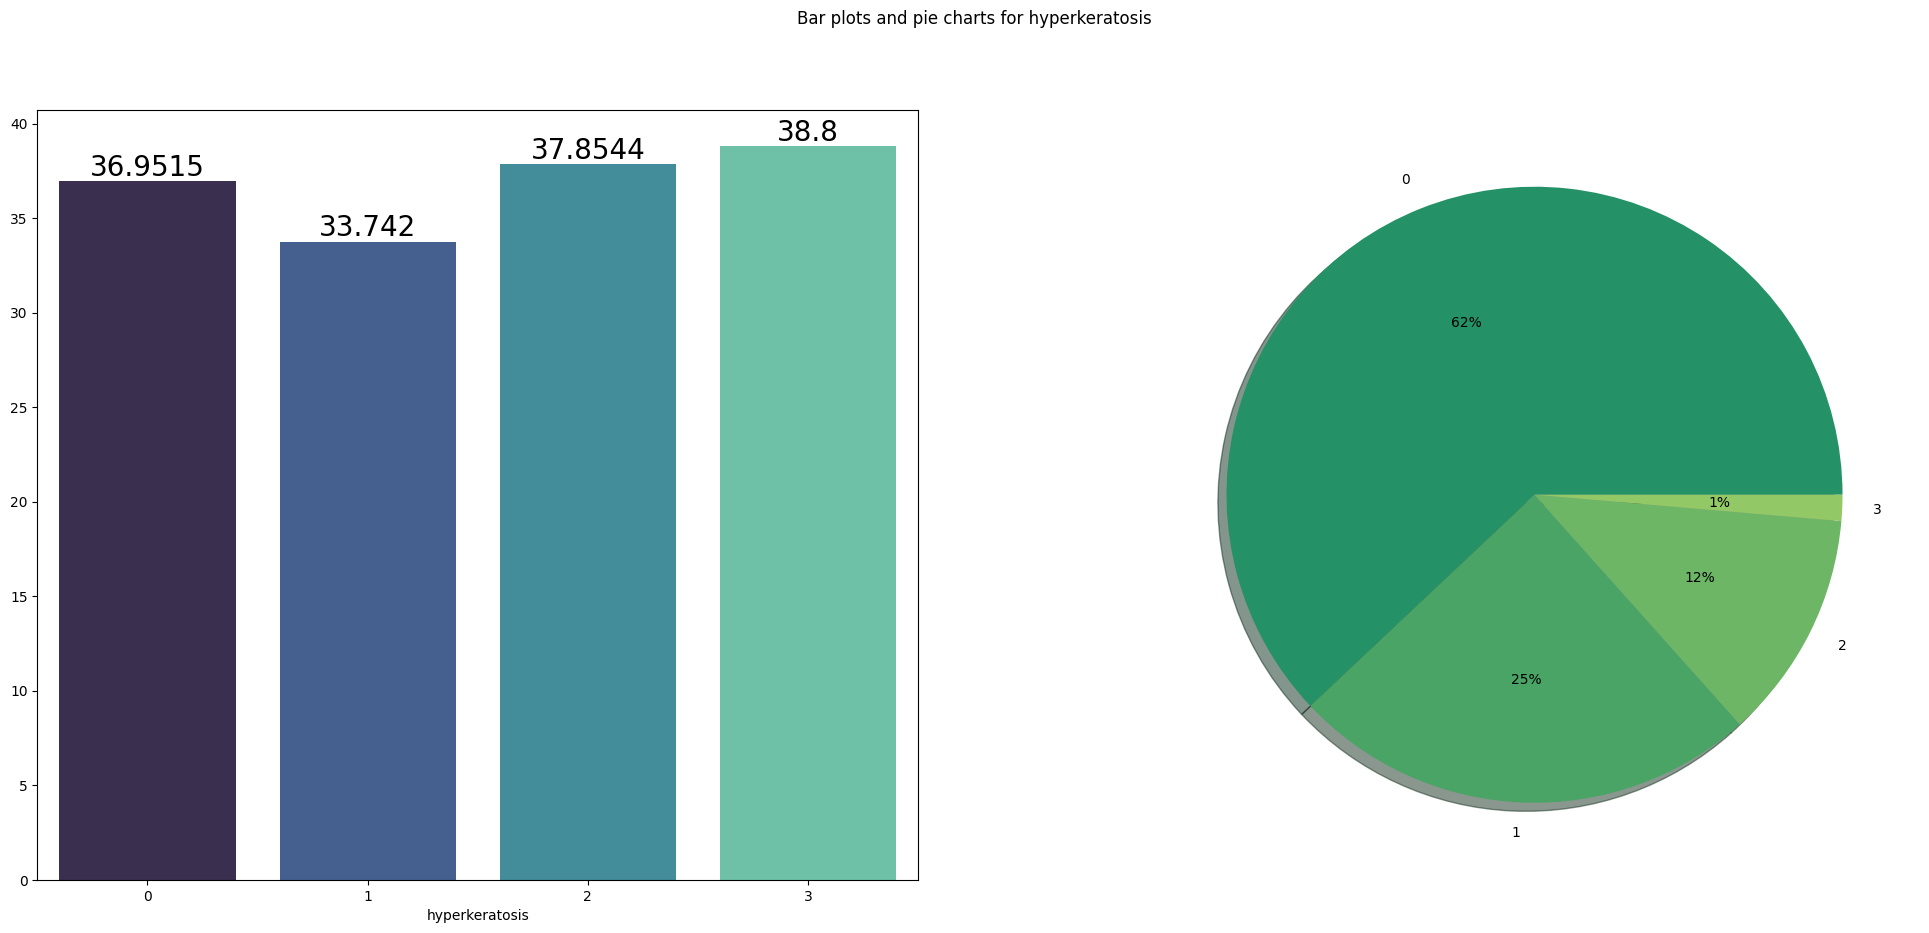

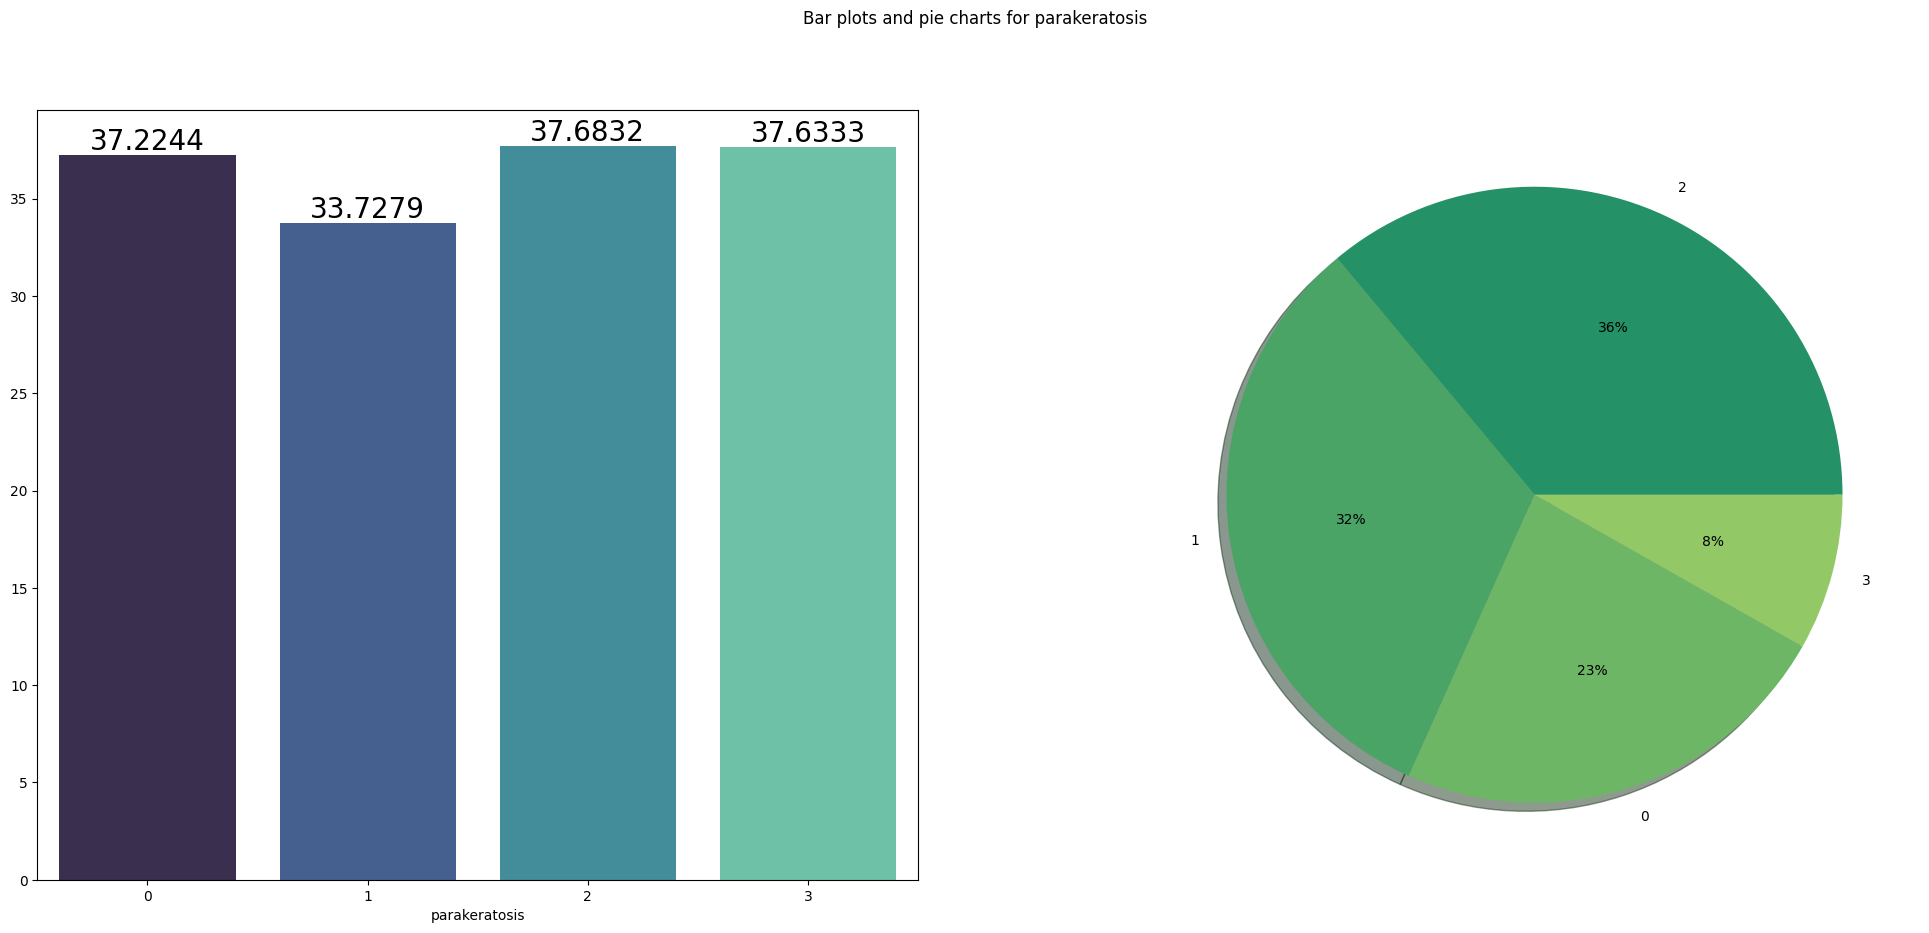

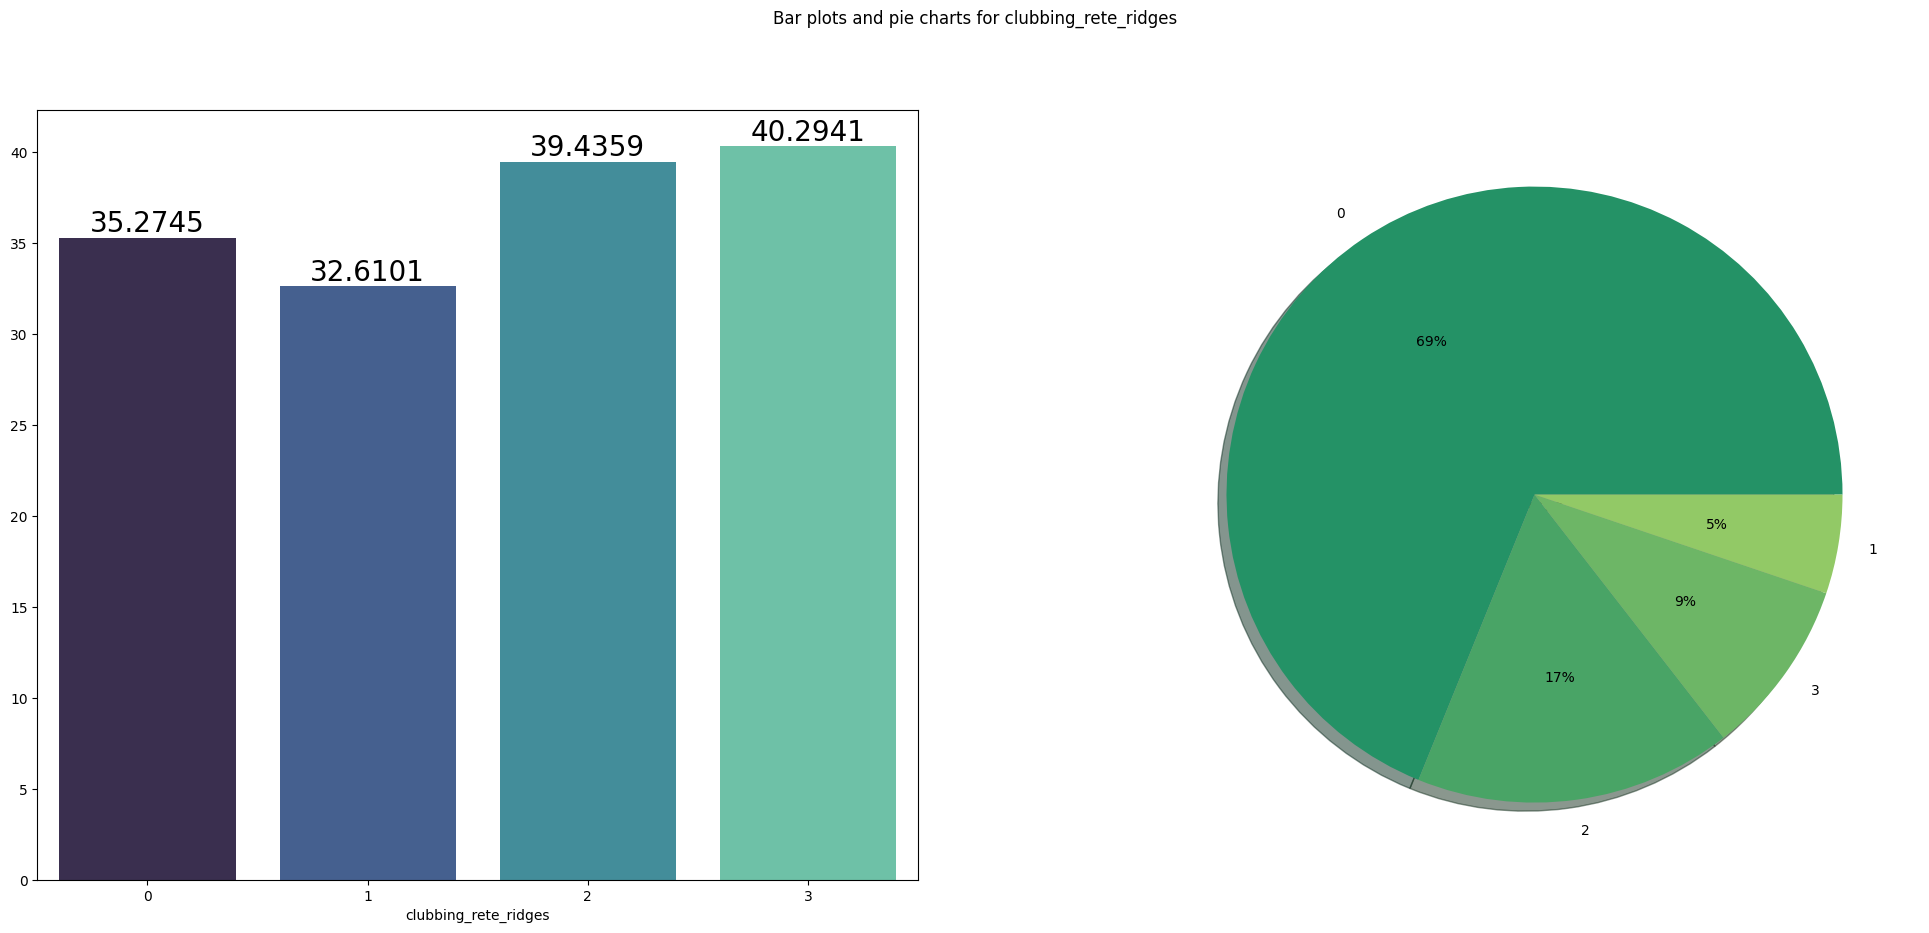

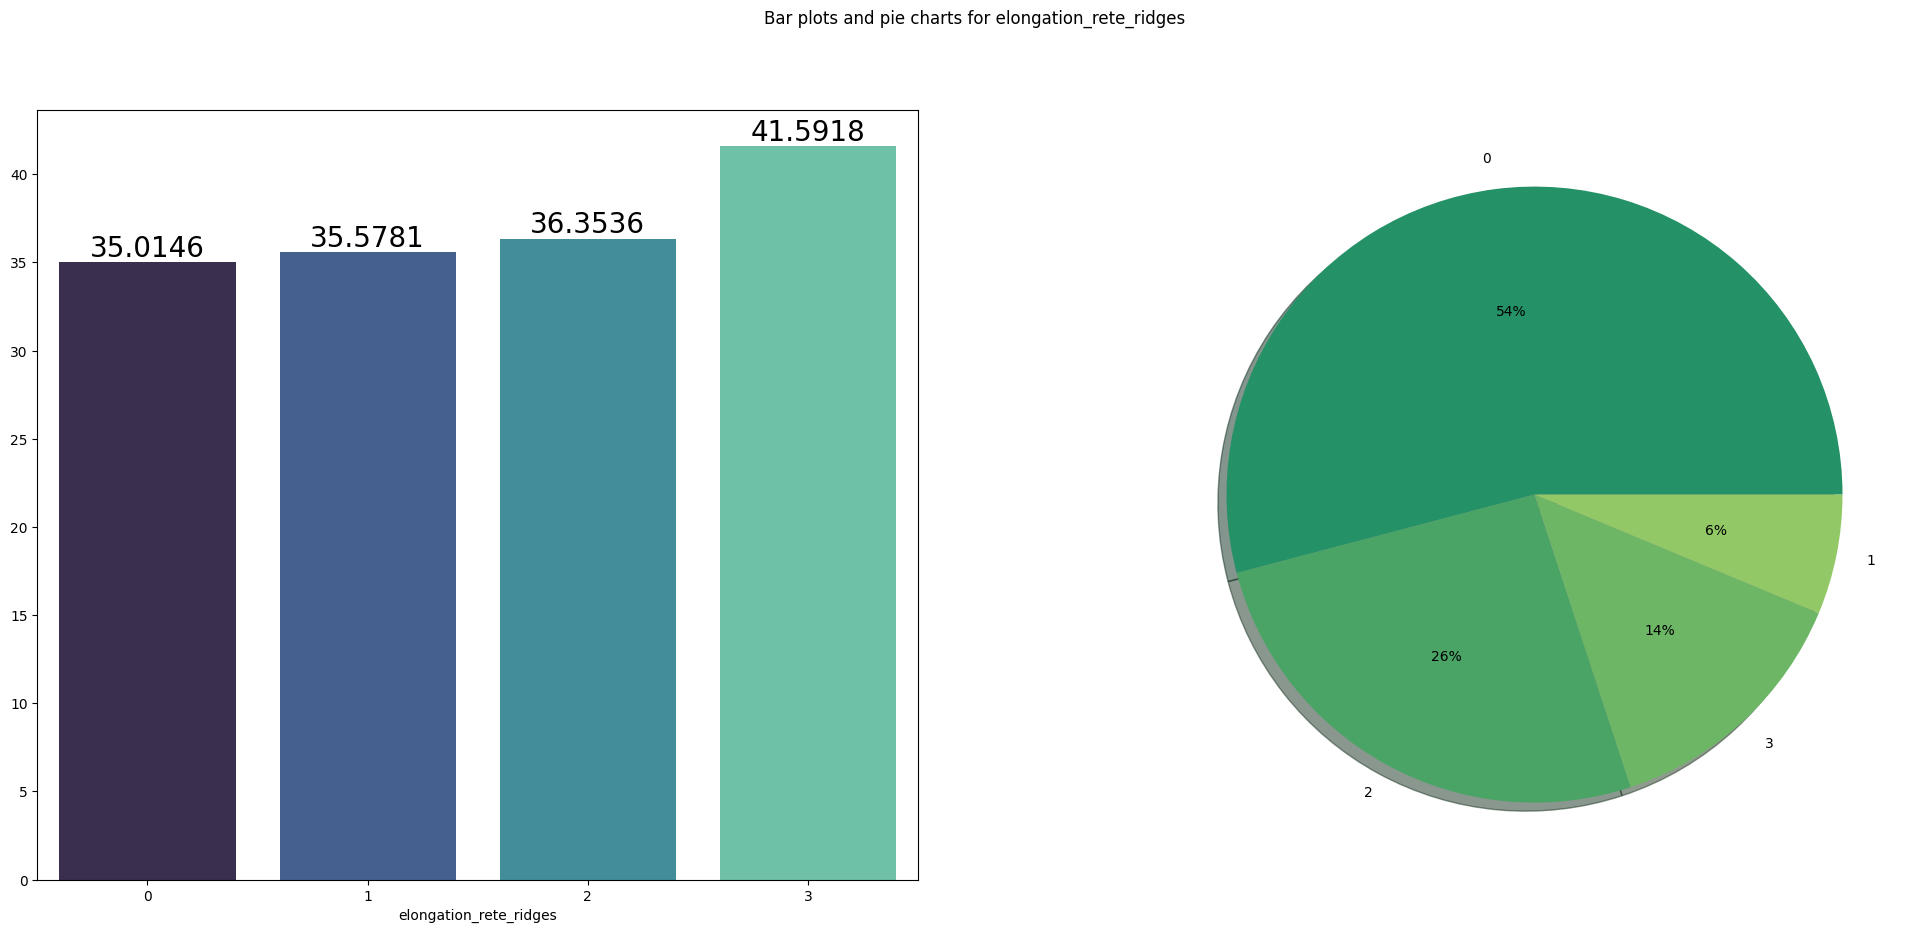

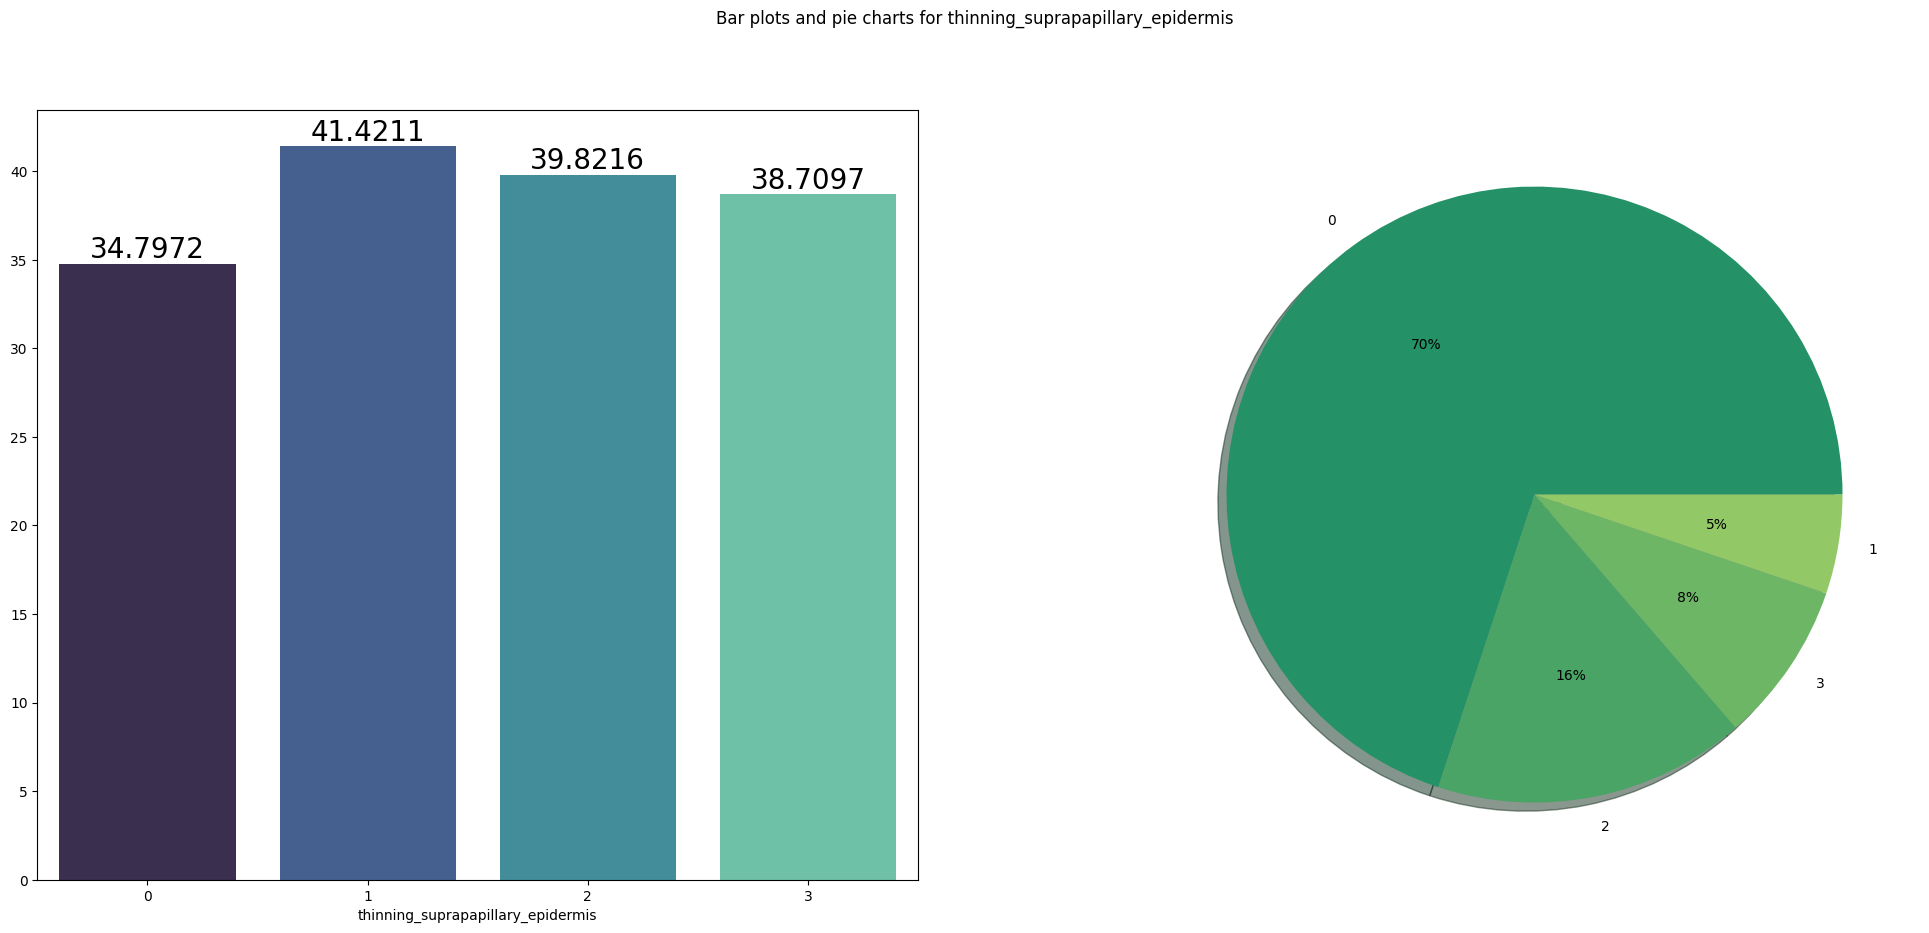

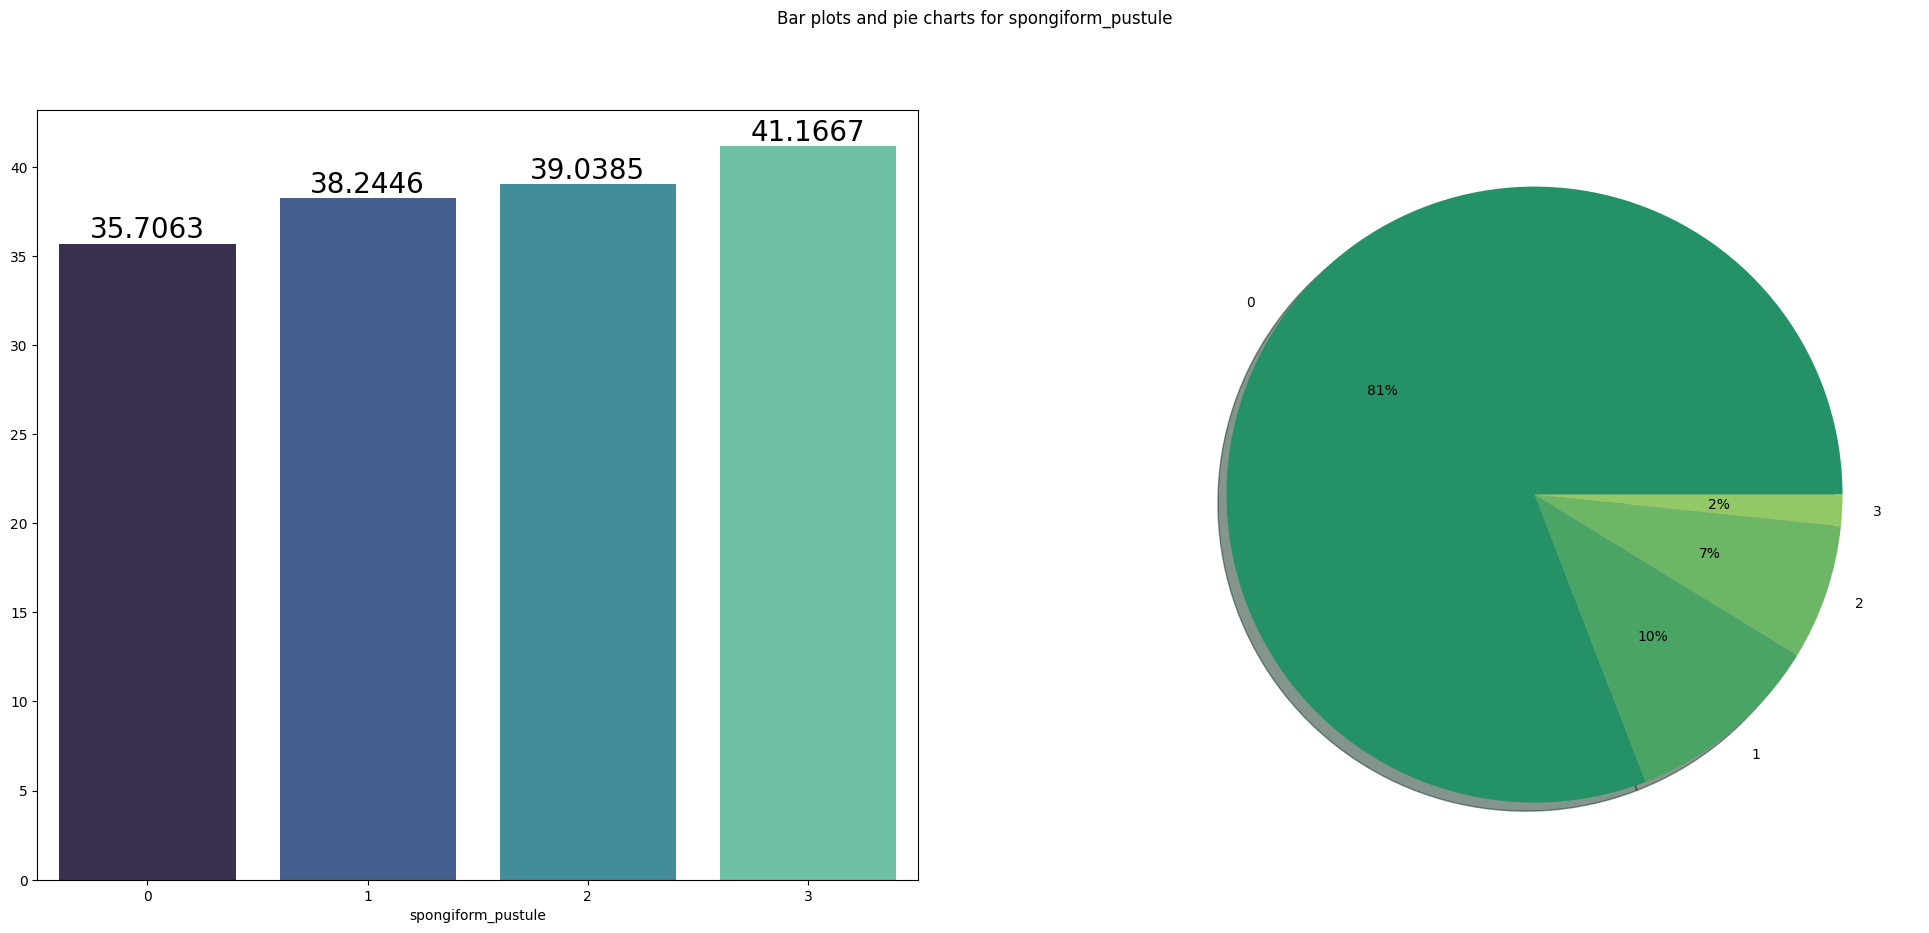

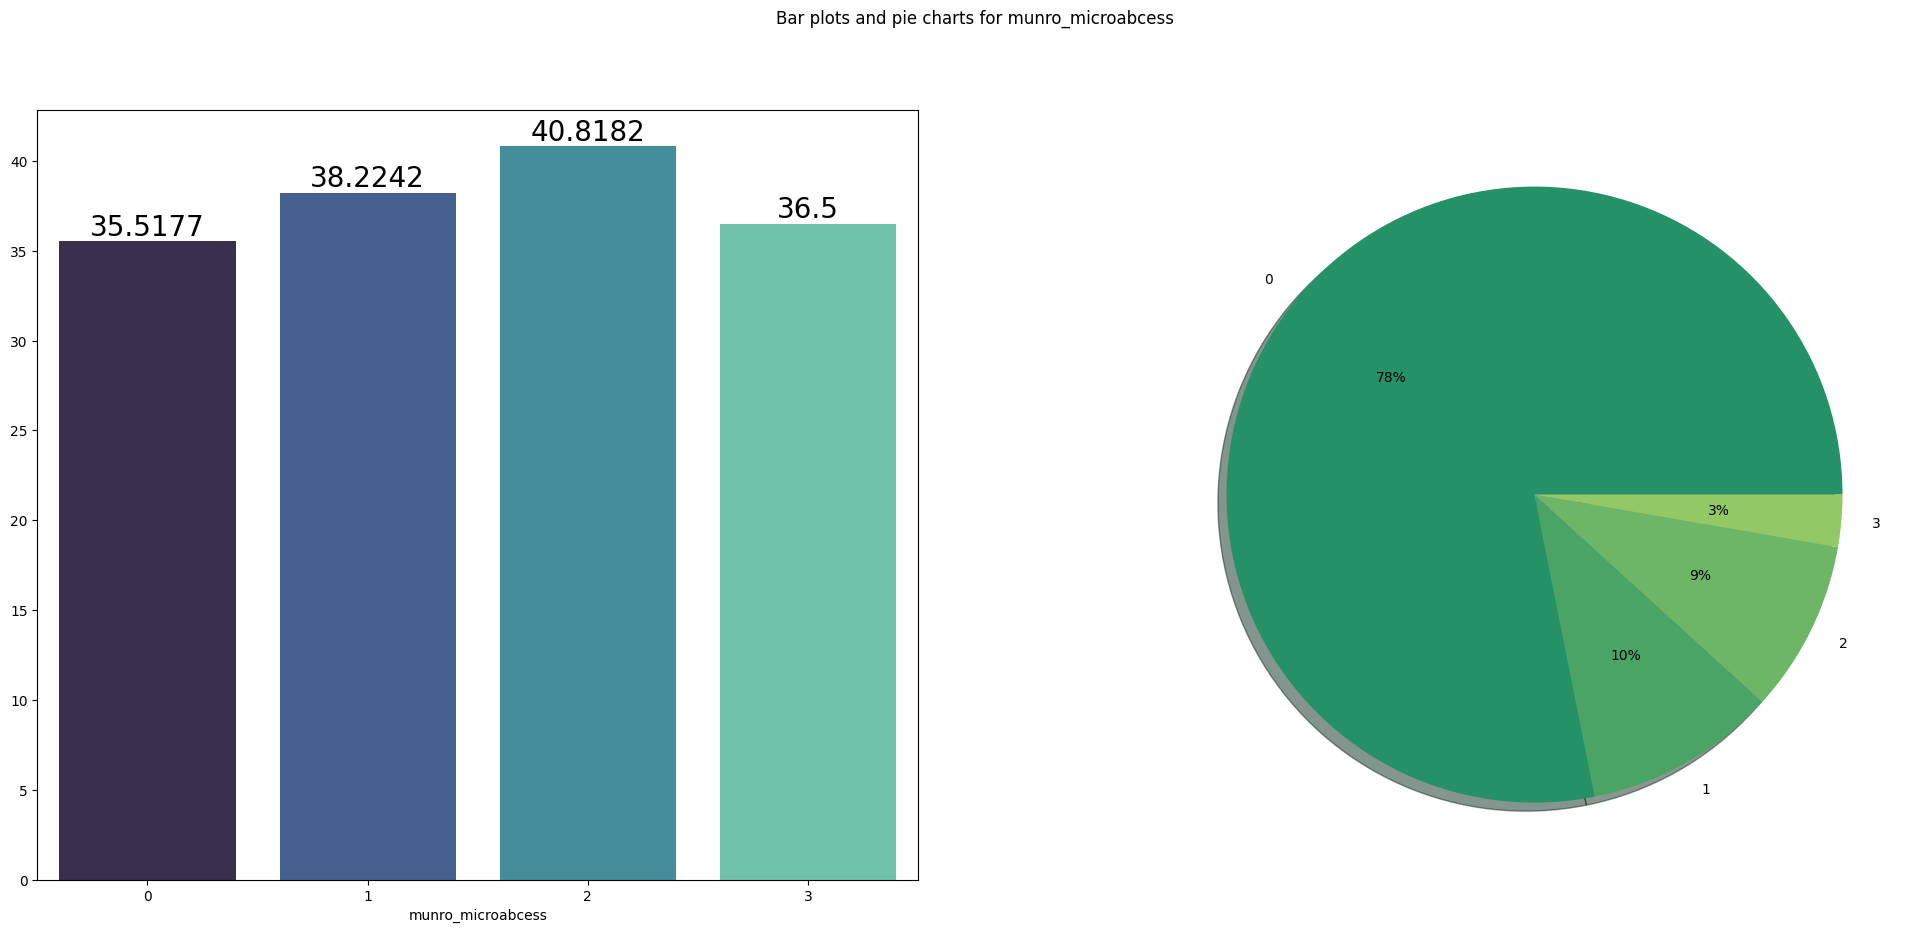

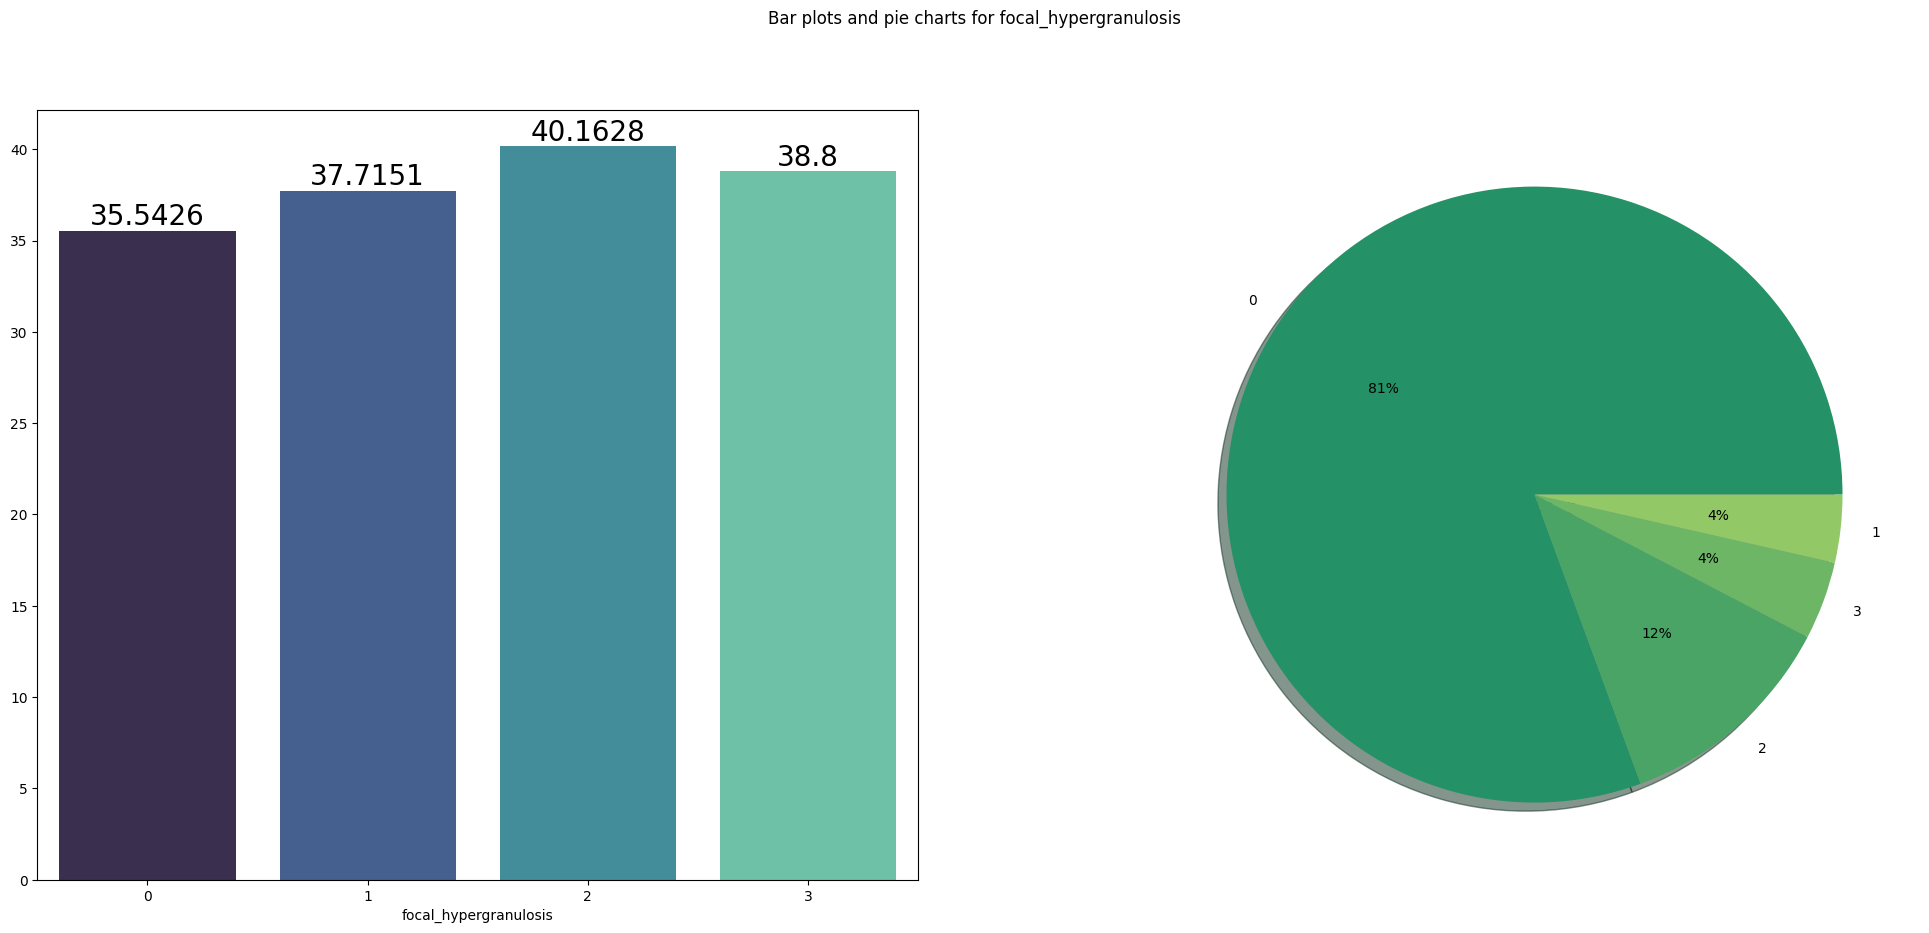

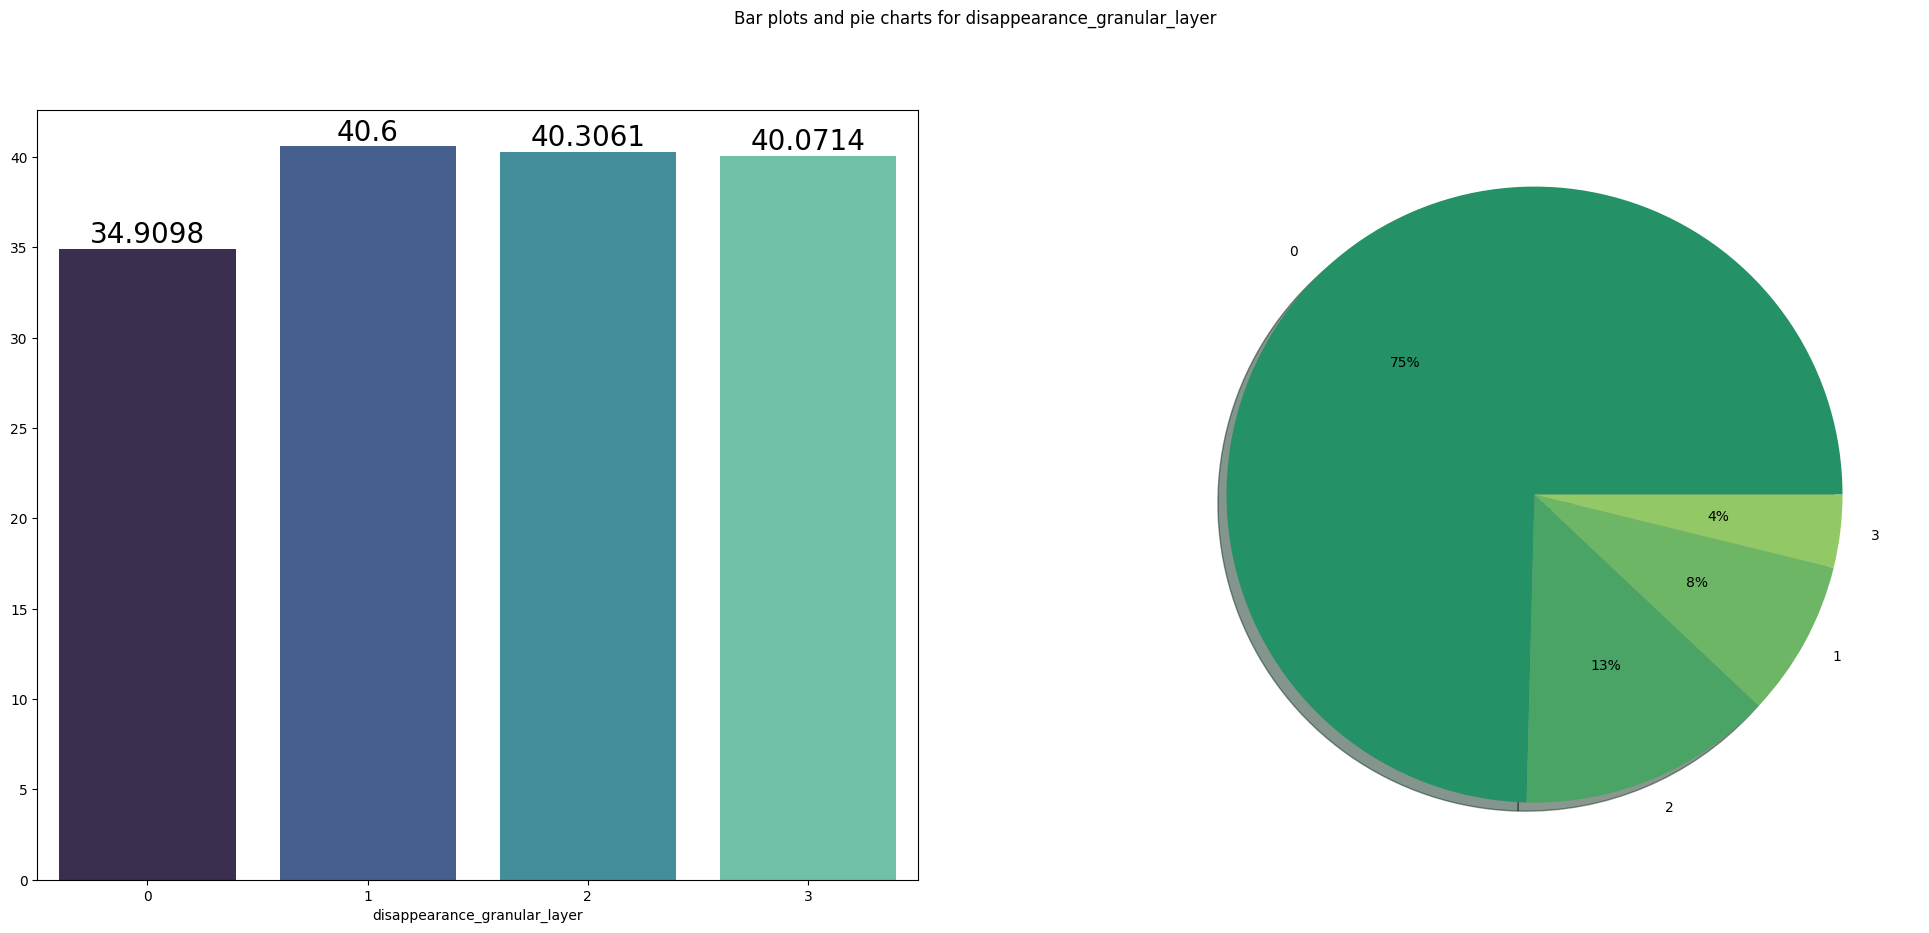

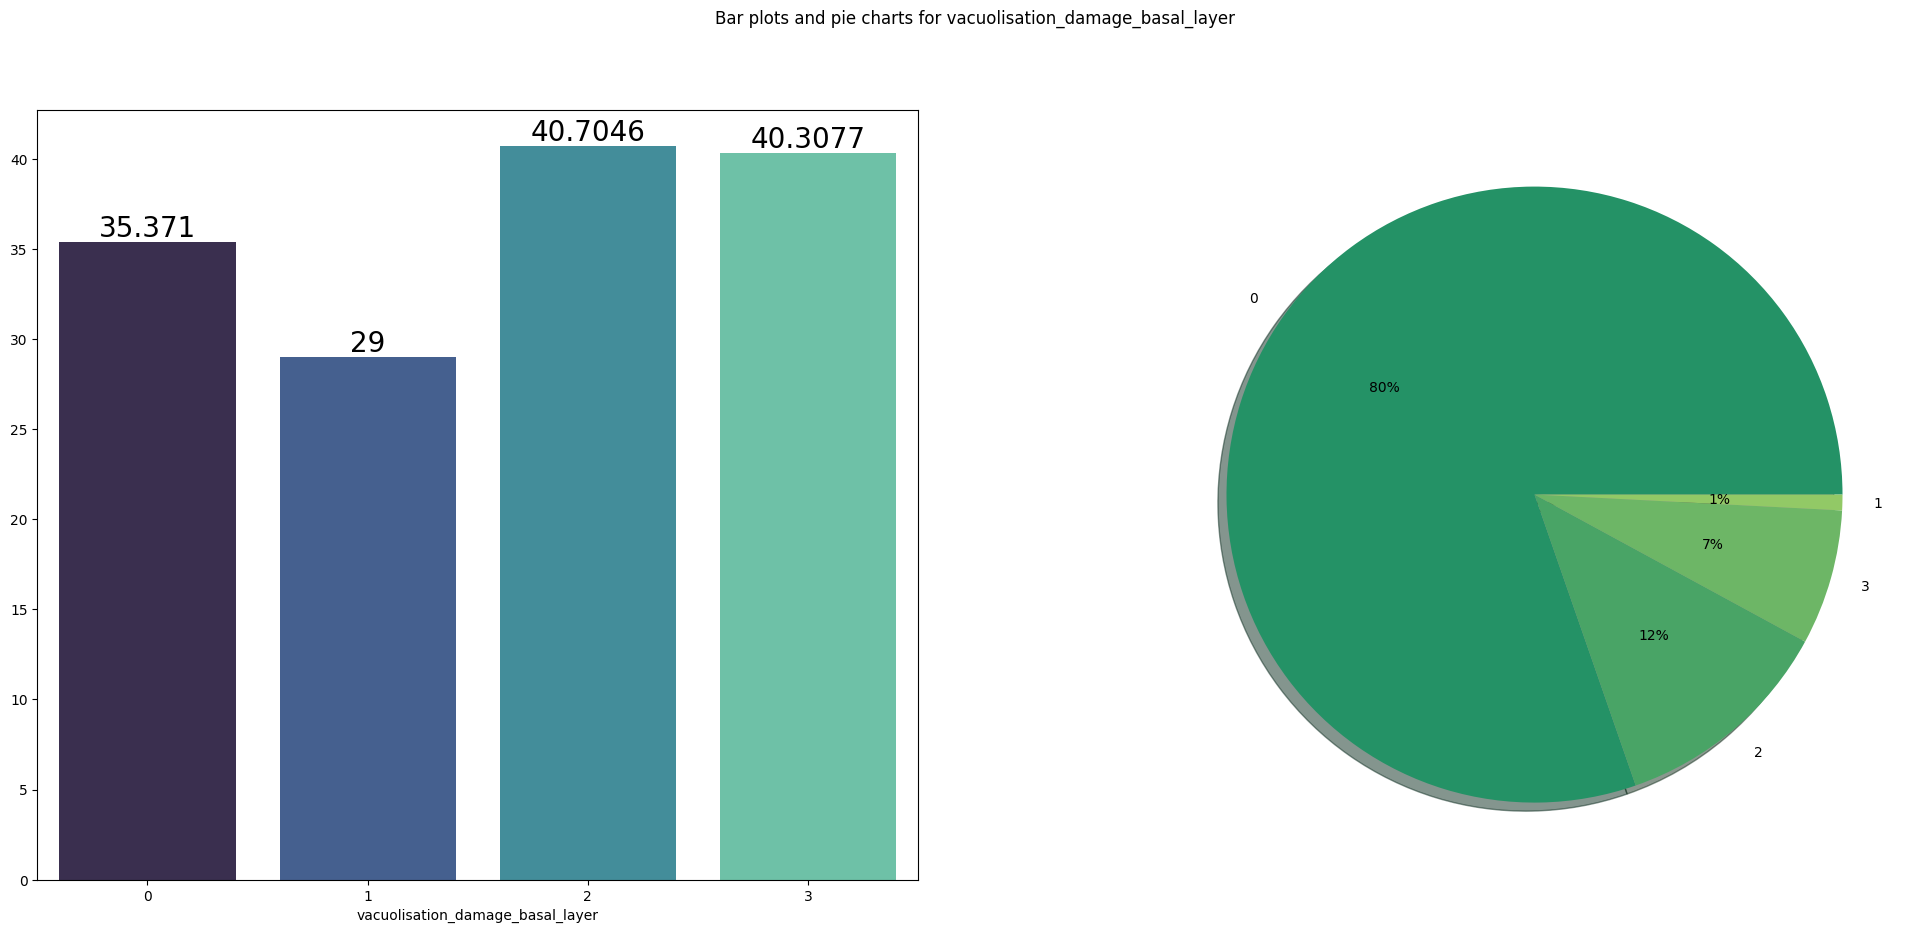

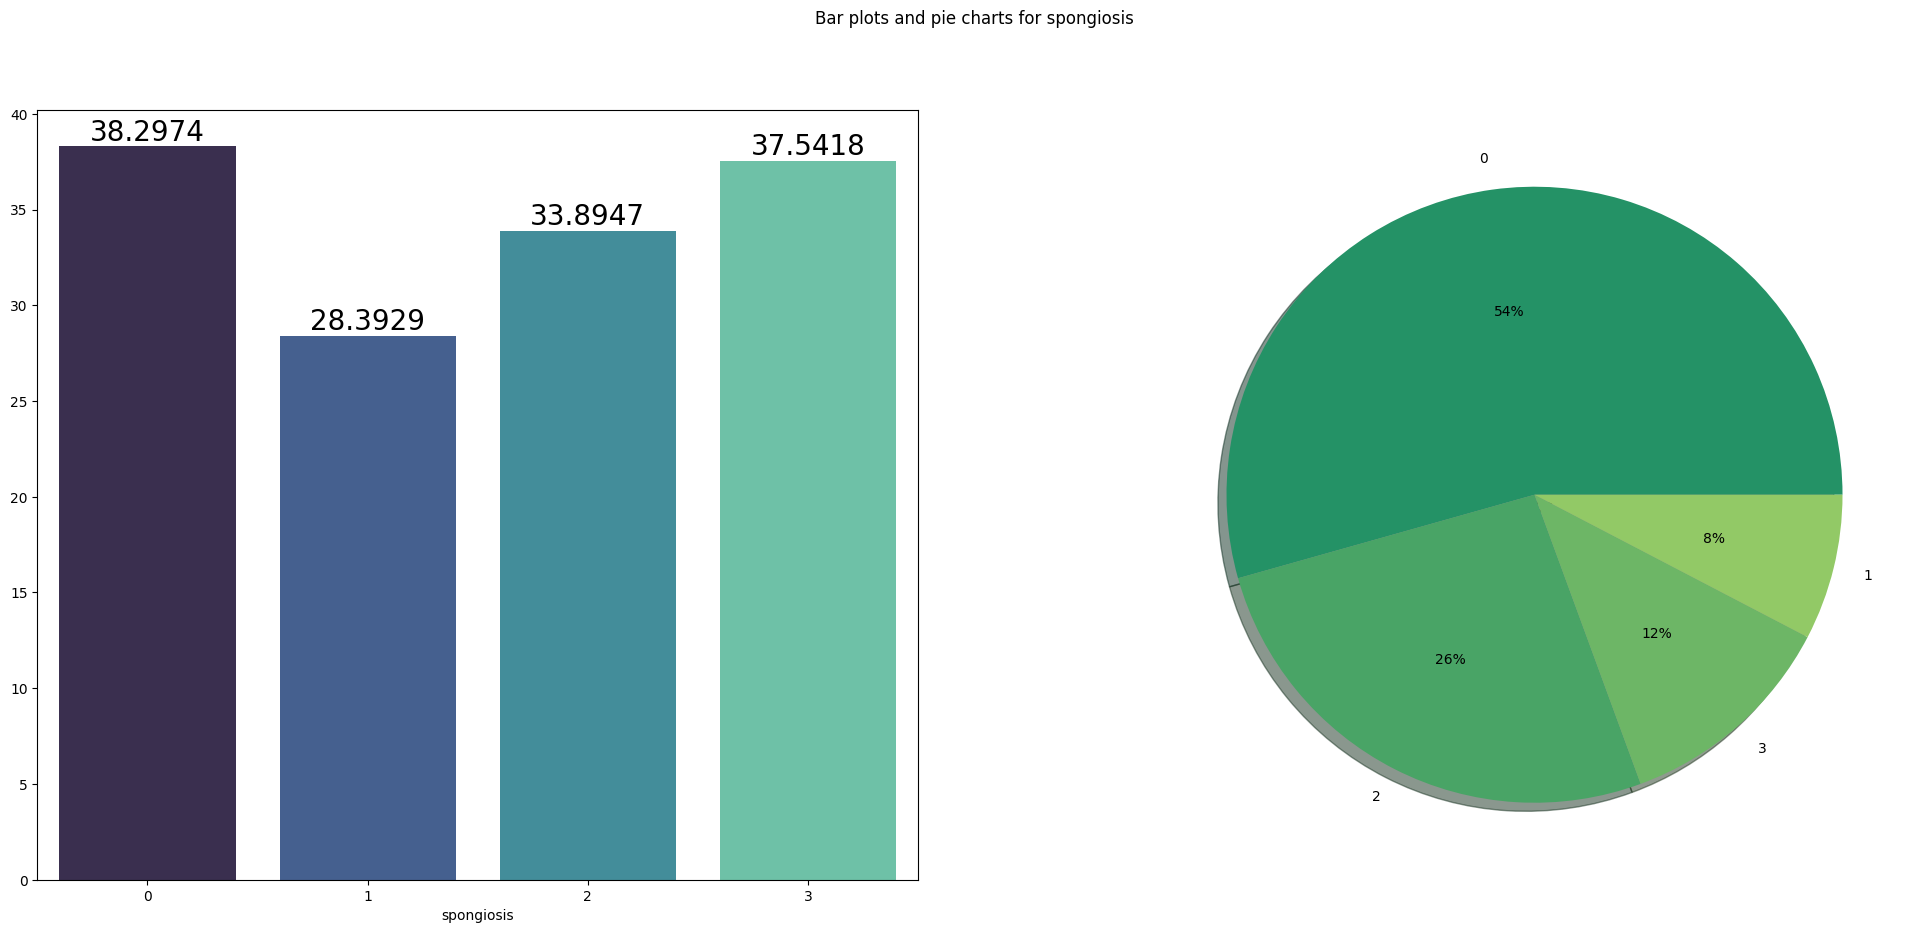

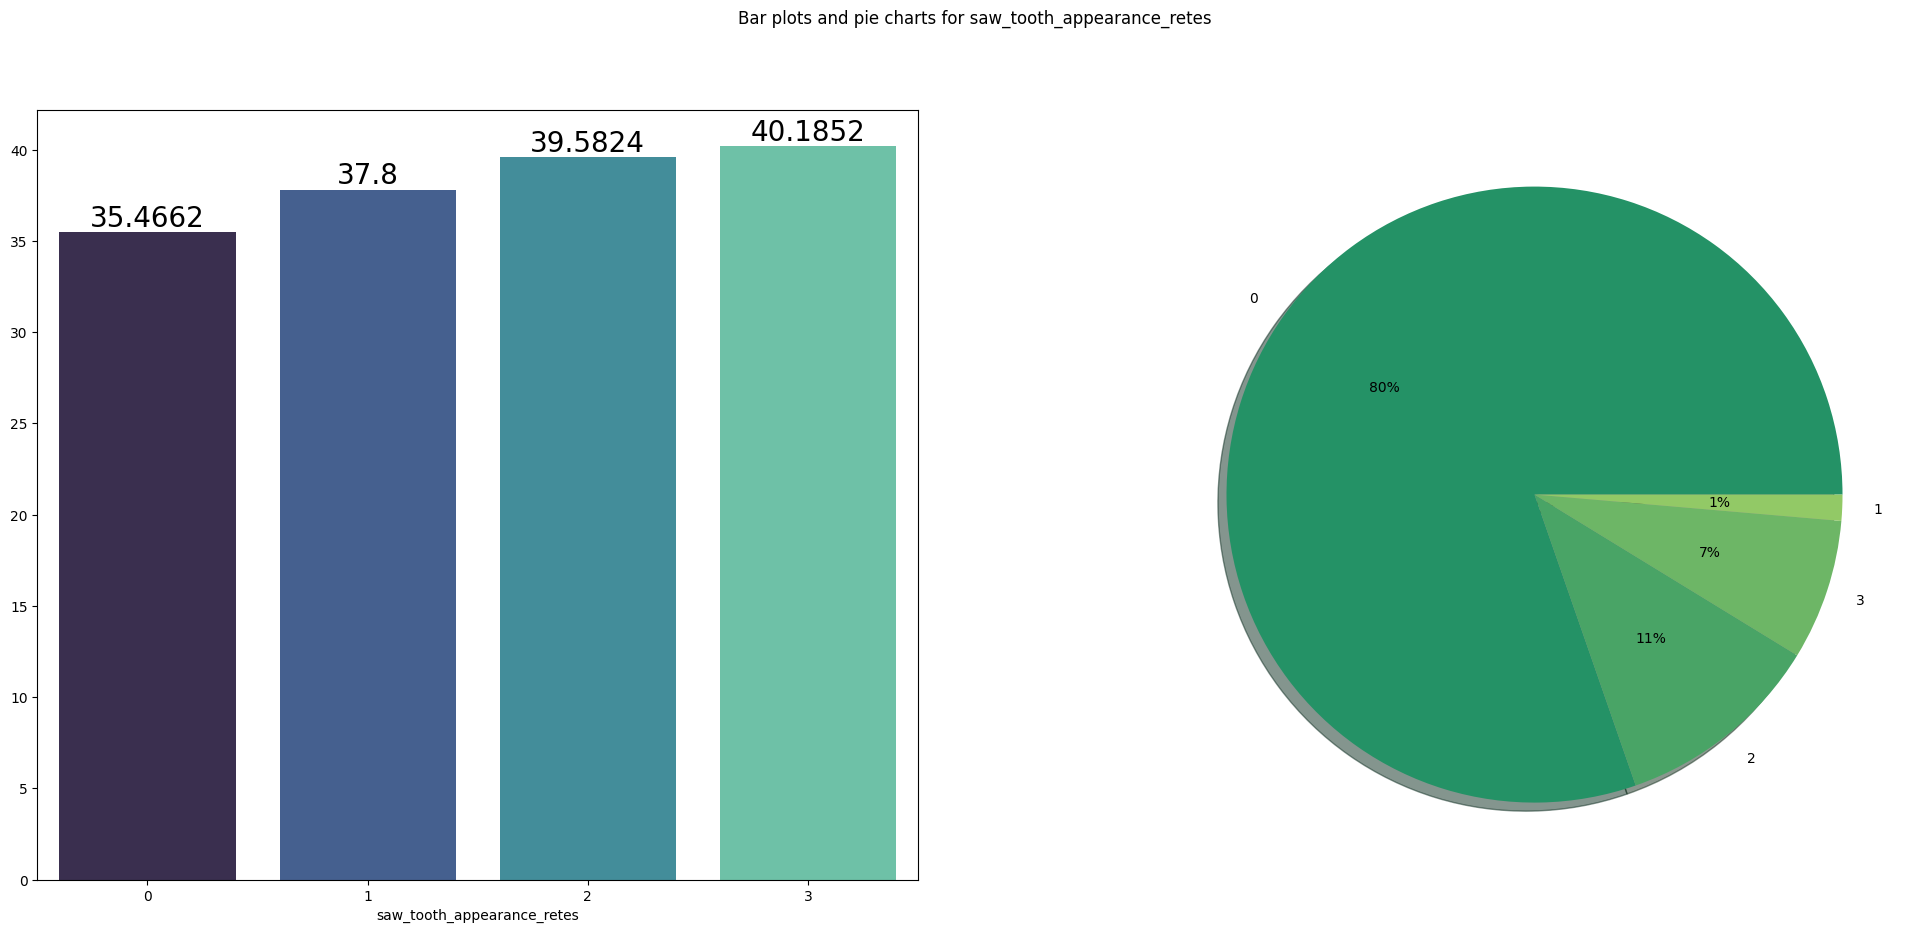

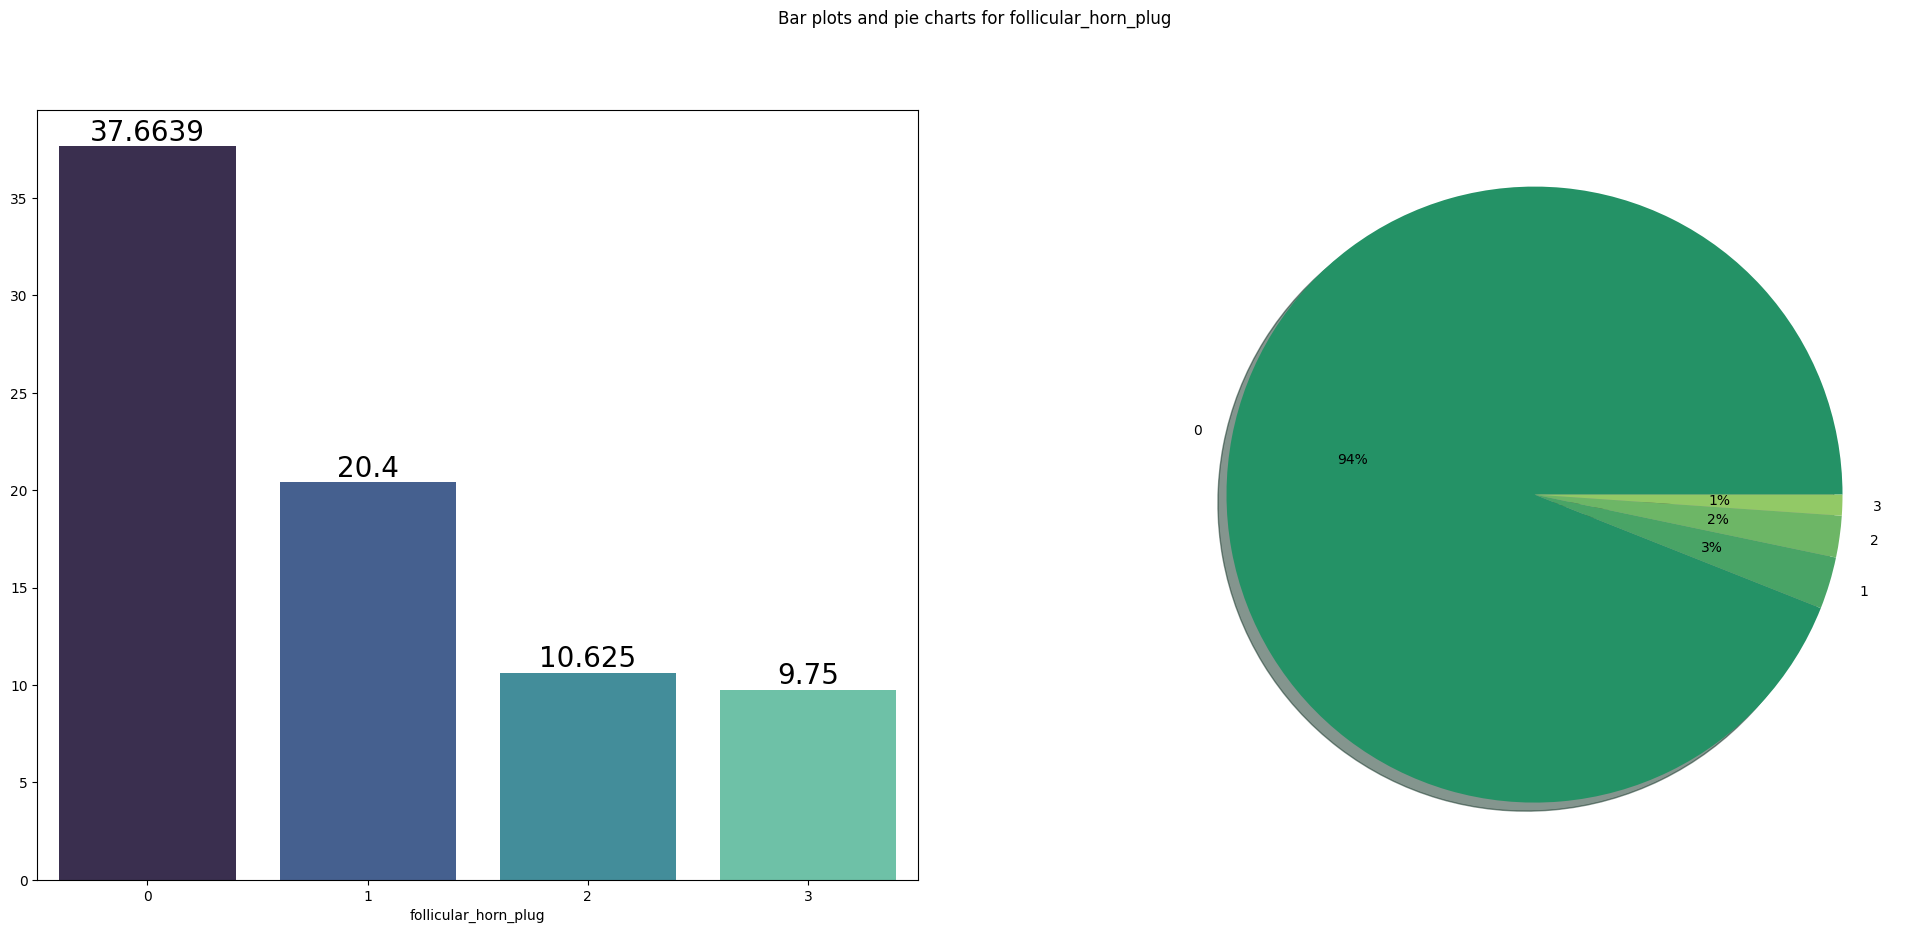

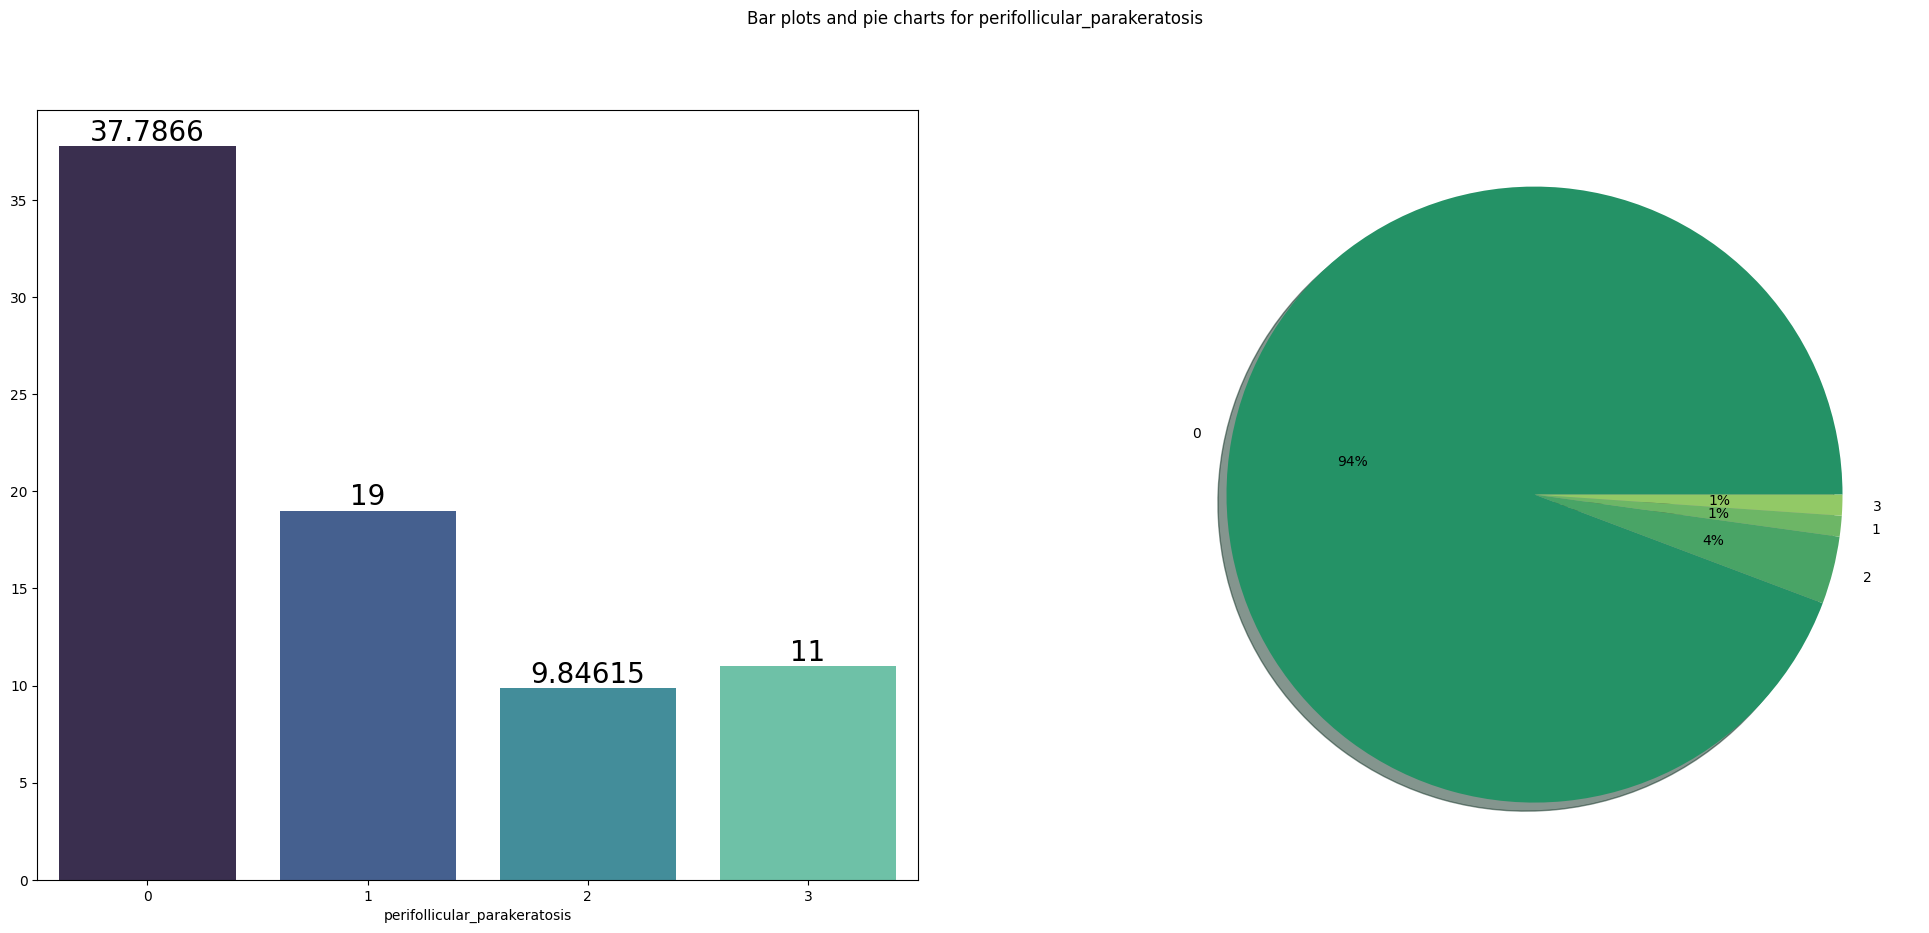

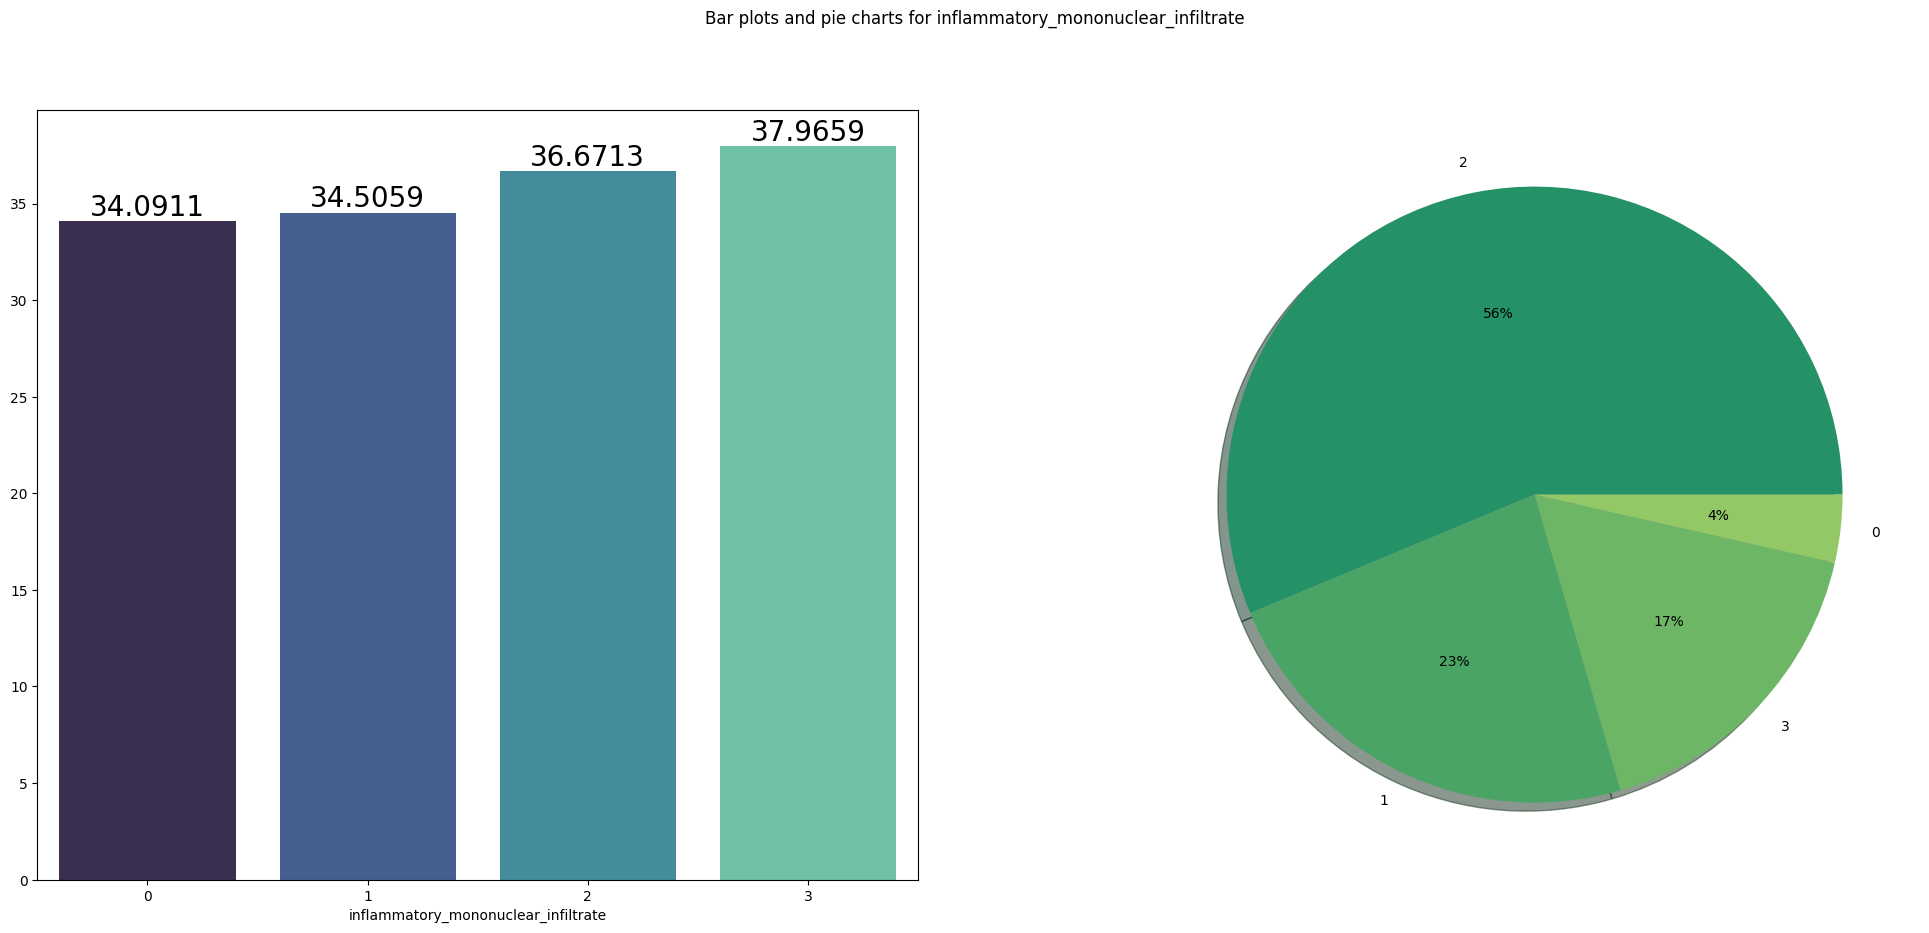

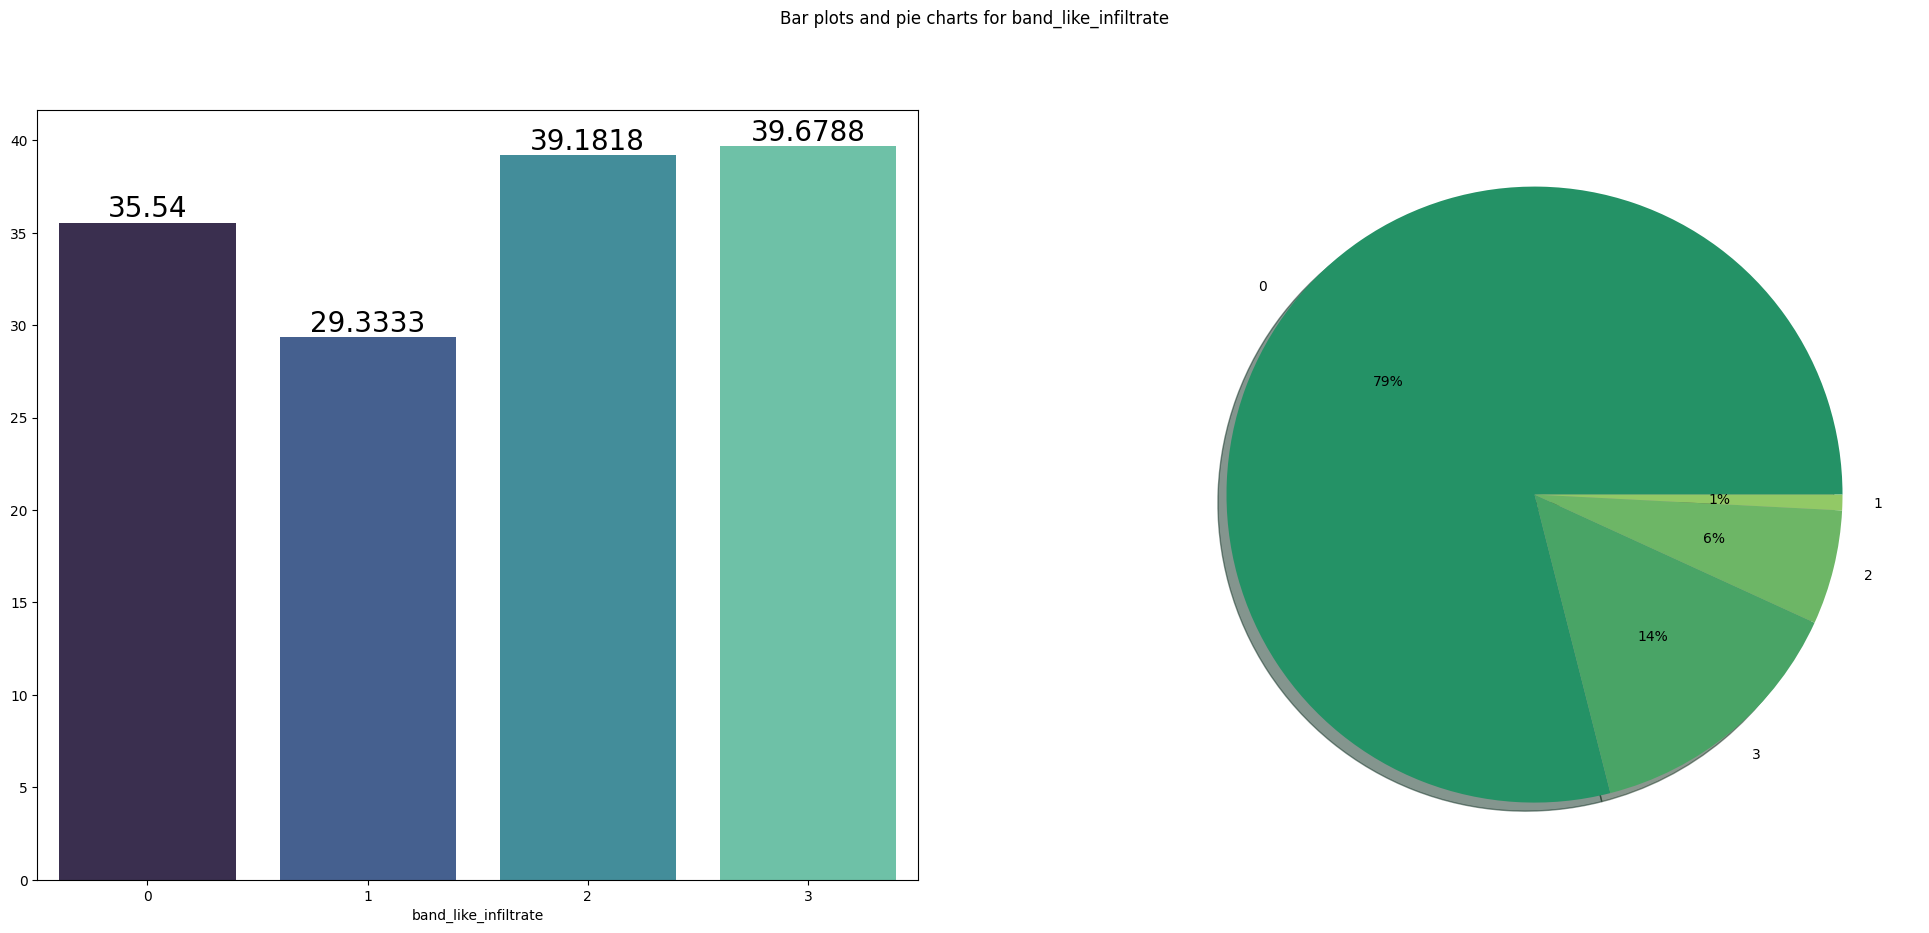

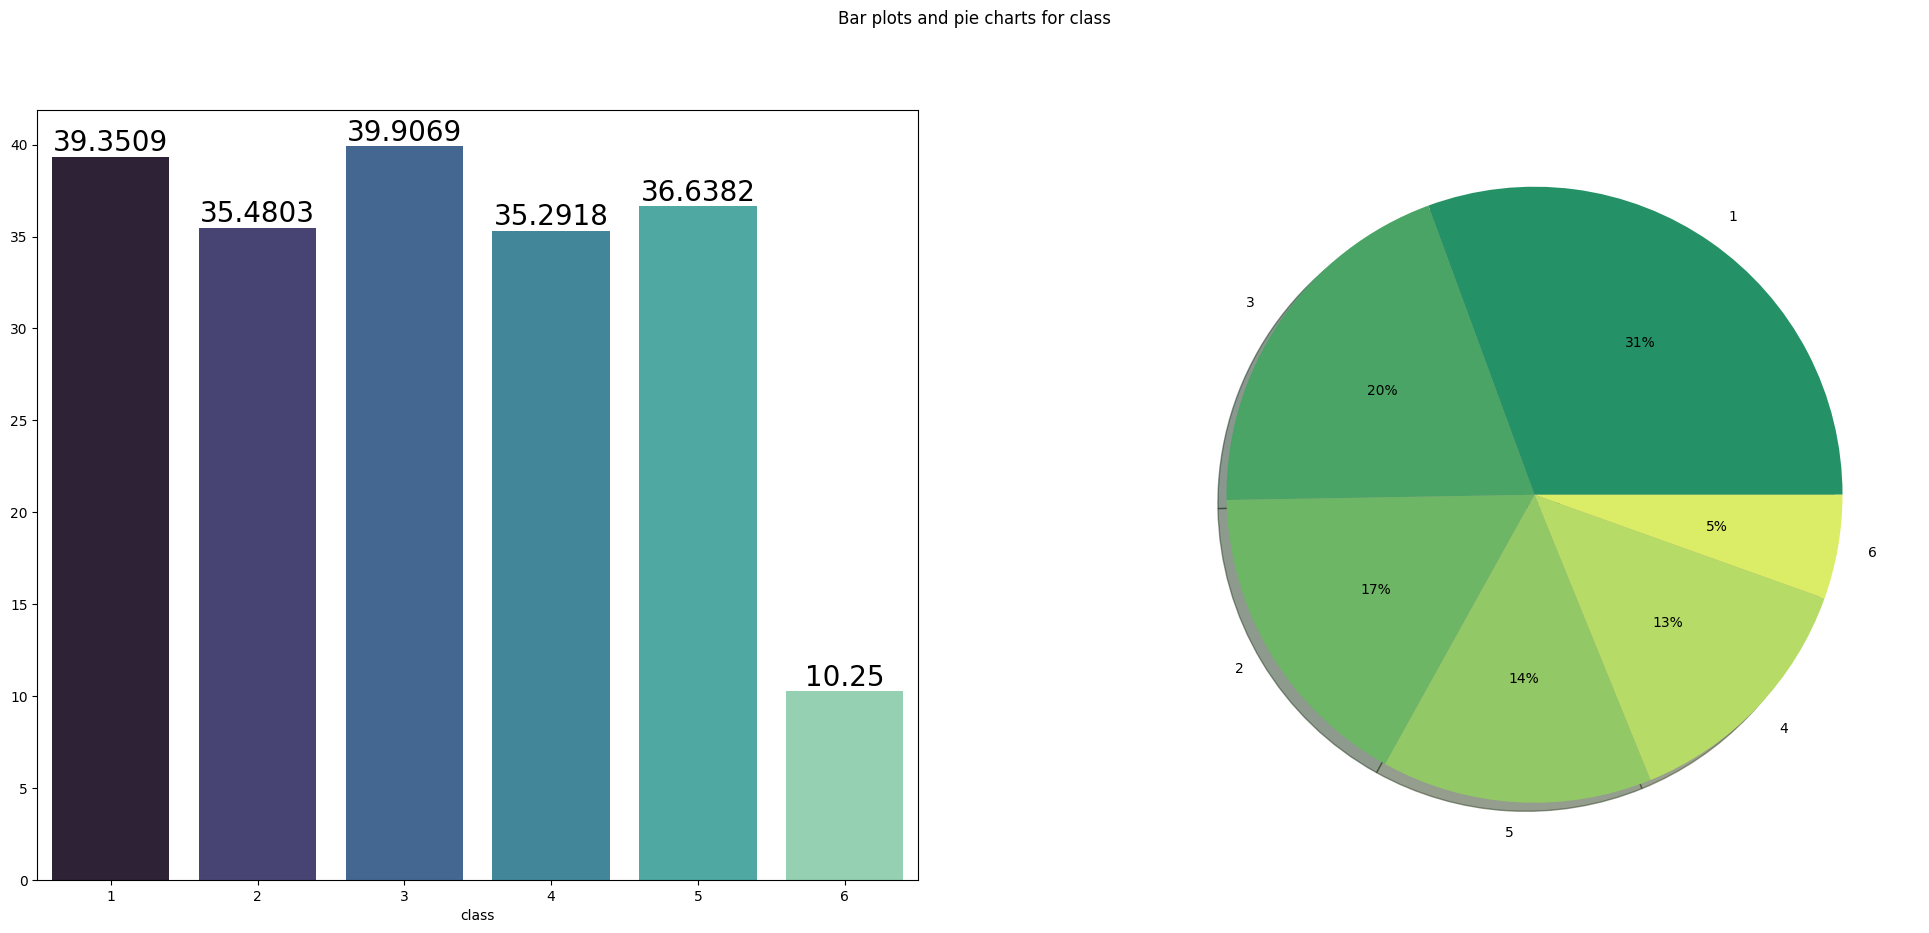

In [6]:
for i in data.columns:
    if i != 'age':
        plots(data, i)

<Axes: xlabel='age', ylabel='Count'>

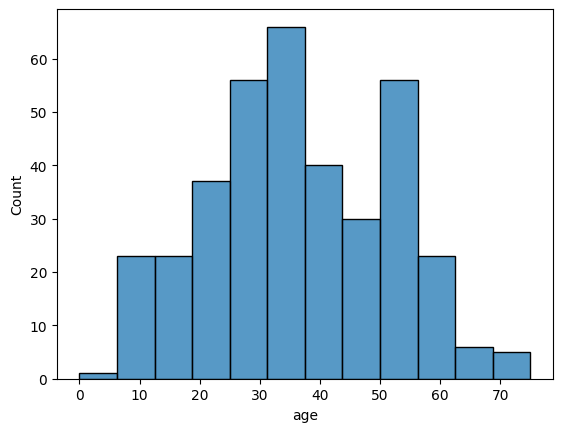

In [7]:
sns.histplot(data, x='age')

<Axes: xlabel='age'>

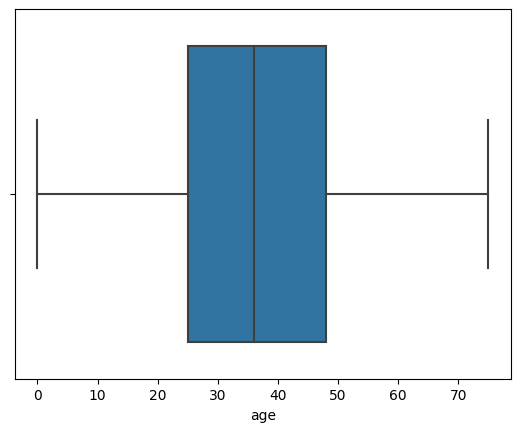

In [8]:
sns.boxplot(data, x='age')

In [9]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [11]:
rfc = RandomForestClassifier(n_estimators=110, max_depth=20, criterion='entropy')
abc = AdaBoostClassifier(n_estimators=60, learning_rate=0.1)
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=20)
lgr = LogisticRegression(multi_class='multinomial')
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=10)
xgb = XGBClassifier(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
models = [rfc, abc, dtc, lgr, gnb, knn, xgb]
names = ['Random Forest', 'Ada Boost', 'Decision Trees',
        'Logistic Regression', 'Naive Bayes', 'KNN',
        'XGBoost']

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

In [13]:
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
sm = SMOTE()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [15]:
class Models:
    def __init__(self, x, y, status_all=False):
        self.x = x
        self.y = y
        self.train = None
        self.test = None
        if status_all:
            counter = Counter(self.y)
            print("Before ", counter)
            sm = SMOTE()
            self.x, self.y = sm.fit_resample(self.x, self.y)
            x_train, x_test, y_train, y_test = train_test_split(self.x, self.y, random_state=42, test_size=0.2)
            self.train = (x_train, y_train)
            self.test = (x_test, y_test)
            print("After ", Counter(self.y))
            print()
        else:
            sm = SMOTE()
            print("")
            x_train, x_test, y_train, y_test = train_test_split(self.x, self.y, random_state=42, test_size=0.2)
            print("Before ", Counter(y_train))
            self.train = sm.fit_resample(x_train, y_train)
            self.test = (x_test, y_test)
            print("After ", Counter(self.train[1]))
            print()
        
    def training(self, model, name):
        x_train, y_train = self.train
        model.fit(x_train, y_train)
        self.evaluate(model, name, 2)
        return model
    
    def evaluate(self, model, name, _round=2):
        x, y = self.test
        y_pred = model.predict(x)
        acc = accuracy_score(y_pred, y)
        acc *= 100
        acc = round(acc, _round)
        print("{}: {}%".format(name, acc))

In [16]:
trained = []
ml = Models(x, y, False)
for i, j in zip(models, names):
    trained += [ml.training(i, j)]
    print()


Before  Counter({0: 81, 2: 59, 1: 52, 4: 42, 3: 41, 5: 17})
After  Counter({4: 81, 1: 81, 0: 81, 3: 81, 2: 81, 5: 81})

Random Forest: 98.65%

Ada Boost: 77.03%

Decision Trees: 100.0%

Logistic Regression: 98.65%

Naive Bayes: 90.54%

KNN: 82.43%



/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBoost: 98.65%



In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

In [50]:
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [33]:
def cd(ax,ay):
    tsne = TSNE(n_components=2, random_state=110, verbose=2)
    x_tsne = tsne.fit_transform(ax)


    # Create a scatterplot of the t-SNE graph
    plt.figure(figsize=(8, 8))
    sns.scatterplot(
        x=x_tsne[:,0], y=x_tsne[:,1],
        hue=ay, palette=sns.color_palette("hls", len(np.unique(ay))),
        alpha=0.8, edgecolor='none'
    )


    plt.title('t-SNE Plot for Dermatology Dataset')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title('t-SNE Visualization of Data with perplexity = 30')
    plt.legend(loc='upper right')
    plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 292 samples in 0.000s...
[t-SNE] Computed neighbors for 292 samples in 0.055s...
[t-SNE] Computed conditional probabilities for sample 292 / 292
[t-SNE] Mean sigma: 3.901228
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 49.6727333, gradient norm = 0.0610136 (50 iterations in 0.096s)
[t-SNE] Iteration 100: error = 49.2395248, gradient norm = 0.0316800 (50 iterations in 0.025s)
[t-SNE] Iteration 150: error = 49.2437592, gradient norm = 0.0422005 (50 iterations in 0.026s)
[t-SNE] Iteration 200: error = 49.2406921, gradient norm = 0.0332533 (50 iterations in 0.045s)
[t-SNE] Iteration 250: error = 49.2618179, gradient norm = 0.0473451 (50 iterations in 0.030s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.261818
[t-SNE] Iteration 300: error = 0.3033277, gradient norm = 0.0054874 (50 iterations in 0.029s)
[t-SNE] Iteration 350: error = 0.2836759, gradient norm = 0.0020435 (

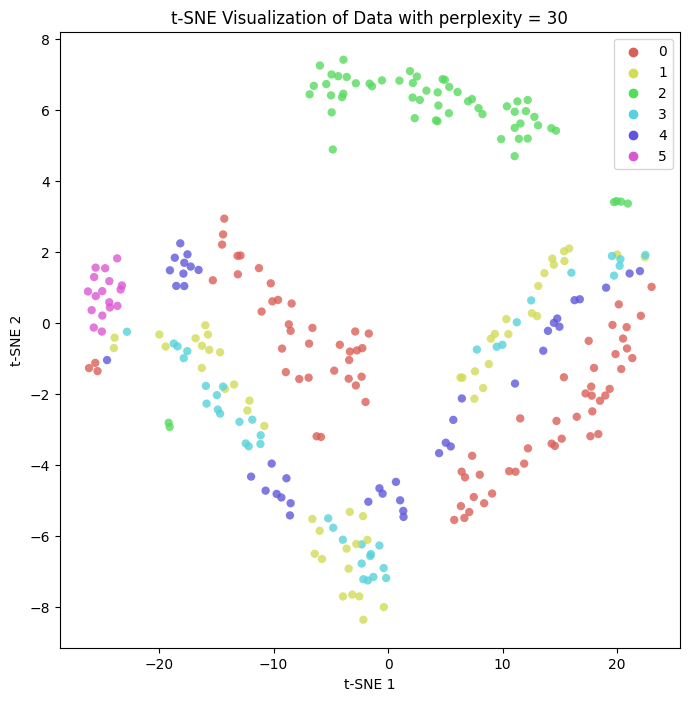

In [34]:
cd(x_train, y_train)

In [39]:
sm = SMOTE()
print("")
xs_train, ys_train = sm.fit_resample(x_train, y_train)

In [ ]:
for i, j in zip(models, names):
    trained += [ml.training(i, j)]
    print()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 486 samples in 0.001s...
[t-SNE] Computed neighbors for 486 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 486 / 486
[t-SNE] Mean sigma: 2.881865
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 53.0005646, gradient norm = 0.0545650 (50 iterations in 0.120s)
[t-SNE] Iteration 100: error = 50.8429413, gradient norm = 0.0083342 (50 iterations in 0.043s)
[t-SNE] Iteration 150: error = 50.4575920, gradient norm = 0.0038899 (50 iterations in 0.054s)
[t-SNE] Iteration 200: error = 50.3219337, gradient norm = 0.0065689 (50 iterations in 0.041s)
[t-SNE] Iteration 250: error = 50.2460709, gradient norm = 0.0039961 (50 iterations in 0.038s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.246071
[t-SNE] Iteration 300: error = 0.4003927, gradient norm = 0.0104645 (50 iterations in 0.039s)
[t-SNE] Iteration 350: error = 0.3144647, gradient norm = 0.0074272 (

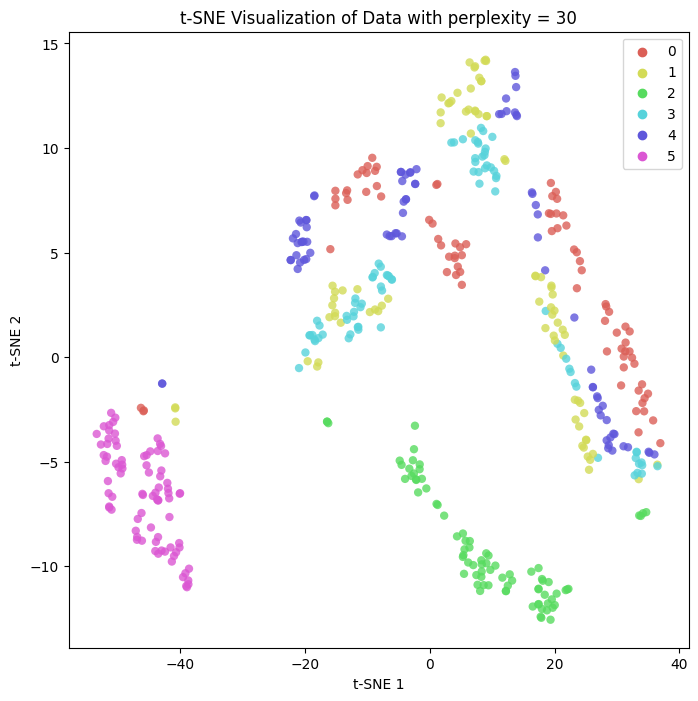

In [40]:
cd(xs_train, ys_train)

In [48]:
sm = SMOTEENN()
print("")
xsENN_train, ysENN_train = sm.fit_resample(x_train, y_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 416 samples in 0.000s...
[t-SNE] Computed neighbors for 416 samples in 0.067s...
[t-SNE] Computed conditional probabilities for sample 416 / 416
[t-SNE] Mean sigma: 3.085122
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 51.7161522, gradient norm = 0.0345758 (50 iterations in 0.193s)
[t-SNE] Iteration 100: error = 49.7307663, gradient norm = 0.0117449 (50 iterations in 0.039s)
[t-SNE] Iteration 150: error = 49.3656998, gradient norm = 0.0140148 (50 iterations in 0.035s)
[t-SNE] Iteration 200: error = 49.2100296, gradient norm = 0.0040282 (50 iterations in 0.034s)
[t-SNE] Iteration 250: error = 49.1342926, gradient norm = 0.0067899 (50 iterations in 0.033s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.134293
[t-SNE] Iteration 300: error = 0.3350297, gradient norm = 0.0090091 (50 iterations in 0.037s)
[t-SNE] Iteration 350: error = 0.2620165, gradient norm = 0.0063858 (

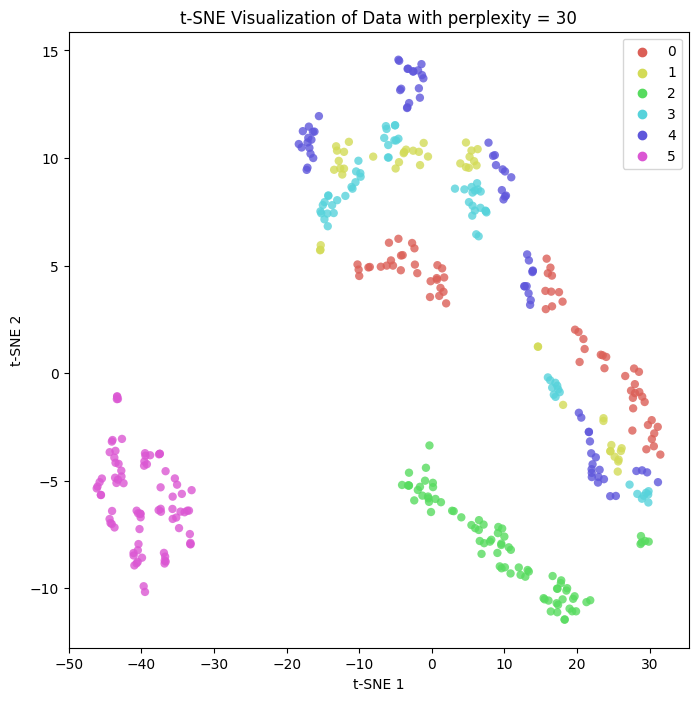

In [49]:
cd(xsENN_train, ysENN_train)

In [51]:
sm = SMOTETomek()
print("")
xsTOMEK_train, ysTOMEK_train = sm.fit_resample(x_train, y_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 484 samples in 0.000s...
[t-SNE] Computed neighbors for 484 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 484 / 484
[t-SNE] Mean sigma: 2.835579
[t-SNE] Computed conditional probabilities in 0.010s
[t-SNE] Iteration 50: error = 53.0028648, gradient norm = 0.0315731 (50 iterations in 0.109s)
[t-SNE] Iteration 100: error = 50.8627701, gradient norm = 0.0178981 (50 iterations in 0.037s)
[t-SNE] Iteration 150: error = 50.4694595, gradient norm = 0.0046599 (50 iterations in 0.076s)
[t-SNE] Iteration 200: error = 50.3139458, gradient norm = 0.0044527 (50 iterations in 0.039s)
[t-SNE] Iteration 250: error = 50.2338371, gradient norm = 0.0158388 (50 iterations in 0.041s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.233837
[t-SNE] Iteration 300: error = 0.3884138, gradient norm = 0.0105817 (50 iterations in 0.040s)
[t-SNE] Iteration 350: error = 0.3016608, gradient norm = 0.0073573 (

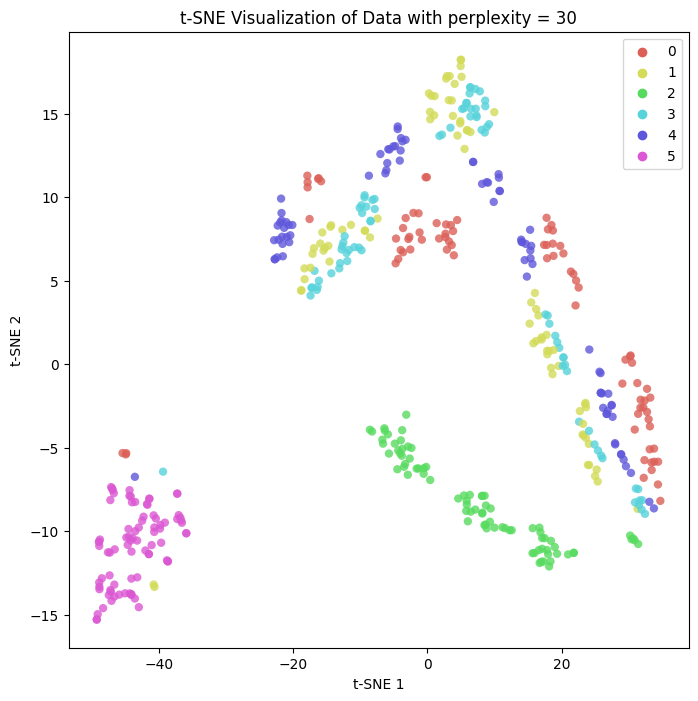

In [52]:
cd(xsTOMEK_train, ysTOMEK_train)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [76]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    SVC(),
    MLPClassifier(),
    SGDClassifier(loss='log', random_state=42)
]

models_description = [
    "Logistic Regression",
    "K-Nearest Neigbors",
    "Gaussion Naive Bayes",
    "Decision Tree Classifier",
    "Random Forest",
    "Extra Trees Classifier",
    "Support Vector Machines (SVM)",
    "Neural Network (Multi Layer Perceptron)",
    "SGD Classifier"
]

In [77]:
results = {}

# DEFAULT TRAIN AND EVALUATE

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=110)

In [79]:
for index in range(len(models)):
    start_time = time.time()
    model = models[index]
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)
    training_time = time.time() - start_time

    results[models_description[index]] = [accuracy_score(Y_test, Y_pred),
                                  precision_score(Y_test, Y_pred, average='weighted'),
                                  recall_score(Y_test, Y_pred, average='weighted'),
                                  f1_score(Y_test, Y_pred, average='weighted'),
                                  training_time]

/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-

In [104]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "Training Time"] )
df_results.sort_values(by="F1-Score", ascending= False, na_position= "first")

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.986486,0.988176,0.986486,0.986615,0.022902
Random Forest,0.986486,0.988176,0.986486,0.986615,0.087164
Extra Trees Classifier,0.986486,0.988176,0.986486,0.986615,0.067415
Decision Tree Classifier,0.972973,0.978979,0.972973,0.973311,0.000808
Neural Network (Multi Layer Perceptron),0.972973,0.972973,0.972973,0.972973,0.296035
K-Nearest Neigbors,0.891892,0.916982,0.891892,0.892990,0.004142
SGD Classifier,0.878378,0.933108,0.878378,0.872350,0.006405
Gaussion Naive Bayes,0.878378,0.938739,0.878378,0.856685,0.000751
Support Vector Machines (SVM),0.729730,0.753306,0.729730,0.654923,0.004503


# SMOTE METHOD

In [87]:
results_SMOTE = {}

In [88]:
sm = SMOTE()
xs_train, ys_train = sm.fit_resample(X_train, Y_train)

In [91]:
for index in range(len(models)):
    start_time = time.time()
    model = models[index]
    model.fit(xs_train, ys_train)

    Y_pred = model.predict(X_test)
    training_time = time.time() - start_time

    results_SMOTE[models_description[index]] = [accuracy_score(Y_test, Y_pred),
                                  precision_score(Y_test, Y_pred, average='weighted'),
                                  recall_score(Y_test, Y_pred, average='weighted'),
                                  f1_score(Y_test, Y_pred, average='weighted'),
                                  training_time]

/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarni

In [103]:
df_results = pd.DataFrame.from_dict(results_SMOTE, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "Training Time"] )
df_results.sort_values(by="F1-Score", ascending= False, na_position= "first")

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.986486,0.988176,0.986486,0.986615,0.039281
Random Forest,0.986486,0.988176,0.986486,0.986615,0.096066
Extra Trees Classifier,0.986486,0.988176,0.986486,0.986615,0.070917
Neural Network (Multi Layer Perceptron),0.972973,0.978979,0.972973,0.973311,0.434984
Decision Tree Classifier,0.959459,0.971622,0.959459,0.961435,0.001574
SGD Classifier,0.959459,0.961486,0.959459,0.959846,0.008719
Support Vector Machines (SVM),0.945946,0.945946,0.945946,0.945946,0.008715
Gaussion Naive Bayes,0.891892,0.949550,0.891892,0.880660,0.000865
K-Nearest Neigbors,0.864865,0.908755,0.864865,0.878187,0.008636


# SMOTE TOMEK

In [98]:
sm = SMOTETomek()
xsTOMEK_train, ysTOMEK_train = sm.fit_resample(x_train, y_train)

In [99]:
results_SMOTETomek = {}

In [100]:
for index in range(len(models)):
    start_time = time.time()
    model = models[index]
    model.fit(xsTOMEK_train, ysTOMEK_train)

    Y_pred = model.predict(X_test)
    training_time = time.time() - start_time

    results_SMOTETomek[models_description[index]] = [accuracy_score(Y_test, Y_pred),
                                  precision_score(Y_test, Y_pred, average='weighted'),
                                  recall_score(Y_test, Y_pred, average='weighted'),
                                  f1_score(Y_test, Y_pred, average='weighted'),
                                  training_time]

/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarni

In [102]:
df_results = pd.DataFrame.from_dict(results_SMOTETomek, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "Training Time"] )
df_results.sort_values(by="F1-Score", ascending= False, na_position= "first")

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.023177
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,0.001482
Random Forest,1.000000,1.000000,1.000000,1.000000,0.092689
Extra Trees Classifier,1.000000,1.000000,1.000000,1.000000,0.070537
Neural Network (Multi Layer Perceptron),1.000000,1.000000,1.000000,1.000000,0.470194
SGD Classifier,0.959459,0.961486,0.959459,0.959846,0.008648
K-Nearest Neigbors,0.918919,0.931306,0.918919,0.921122,0.005774
Support Vector Machines (SVM),0.918919,0.956341,0.918919,0.915878,0.008094
Gaussion Naive Bayes,0.891892,0.949550,0.891892,0.880660,0.000823
